### Problem Statement- 
A Consumer finance company specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

**Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

**Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Understanding of Data

Reading Data file:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
loan=pd.read_csv("C:\\Users\\Kaustubh93\\Downloads\\UPGRAD\\EDA\\Upgrad-ML-and-AI-master\\Upgrad-ML-and-AI-master\\loan.csv",encoding="ISO-8859-1",low_memory=False)
display(loan.head())

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [2]:
# inspect the structure etc.
print(loan.info(), "\n")
print(loan.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None 

(39717, 111)


In [3]:
round(loan.isnull().sum()/len(loan.index),6)*100

id                              0.0000
member_id                       0.0000
loan_amnt                       0.0000
funded_amnt                     0.0000
funded_amnt_inv                 0.0000
                                ...   
tax_liens                       0.0982
tot_hi_cred_lim               100.0000
total_bal_ex_mort             100.0000
total_bc_limit                100.0000
total_il_high_credit_limit    100.0000
Length: 111, dtype: float64

* As we can see many columns are totally empty , so we can drop them directly.

In [4]:
round(loan.isnull().sum()/len(loan.index),6)*100

id                              0.0000
member_id                       0.0000
loan_amnt                       0.0000
funded_amnt                     0.0000
funded_amnt_inv                 0.0000
                                ...   
tax_liens                       0.0982
tot_hi_cred_lim               100.0000
total_bal_ex_mort             100.0000
total_bc_limit                100.0000
total_il_high_credit_limit    100.0000
Length: 111, dtype: float64

In [5]:
loan.isnull().all().sum(axis=0)

54

In [6]:
loan=loan.dropna(axis=1,how='all')

In [7]:
loan.isnull().all().sum()

0

In [8]:
# summing up the missing values (column-wise)
(loan.isnull()).sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [9]:
loan.shape

(39717, 57)

In [10]:
loan=loan.drop('mths_since_last_delinq',axis=1)
loan=loan.drop('mths_since_last_record',axis=1)
loan=loan.drop('next_pymnt_d',axis=1)

In [11]:
loan.shape

(39717, 54)

In [12]:
round(loan.isnull().sum()/len(loan.index),6)*100

id                             0.0000
member_id                      0.0000
loan_amnt                      0.0000
funded_amnt                    0.0000
funded_amnt_inv                0.0000
term                           0.0000
int_rate                       0.0000
installment                    0.0000
grade                          0.0000
sub_grade                      0.0000
emp_title                      6.1913
emp_length                     2.7066
home_ownership                 0.0000
annual_inc                     0.0000
verification_status            0.0000
issue_d                        0.0000
loan_status                    0.0000
pymnt_plan                     0.0000
url                            0.0000
desc                          32.5805
purpose                        0.0000
title                          0.0277
zip_code                       0.0000
addr_state                     0.0000
dti                            0.0000
delinq_2yrs                    0.0000
earliest_cr_

Now finding how many rows are empty

In [13]:
len(loan[loan.isnull().sum(axis=1)>1].index)/len(loan.index)*100

4.018430395044943

loan.to_csv(r'C:\Users\bhart\Documents\ML\Assignment2\Upgrad-ML-and-AI-master\loan_clean.xlsx',index = None, header=True)

In [14]:
loan.isnull().sum(axis=1).index

RangeIndex(start=0, stop=39717, step=1)

In [15]:
loan.collections_12_mths_ex_med.unique()


array([ 0., nan])

In [16]:
loan.acc_now_delinq.unique()

array([0], dtype=int64)

In [17]:
loan.chargeoff_within_12_mths.unique()


array([ 0., nan])

In [18]:
import pandas as pd
Data_Dictionary=pd.read_excel('C:\\Users\\Kaustubh93\\Downloads\\UPGRAD\\EDA\\Upgrad-ML-and-AI-master\\Upgrad-ML-and-AI-master\\Data_Dictionary.xlsx',encoding="ISO-8859-1")
#loan=pd.read_csv('loan/loan.csv',encoding="ISO-8859-1",low_memory=False)

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Data_Dictionary.head(100))

LoanStatNew  \
0                   acc_now_delinq   
1             acc_open_past_24mths   
2                       addr_state   
3                         all_util   
4                       annual_inc   
5                 annual_inc_joint   
6                 application_type   
7                      avg_cur_bal   
8                   bc_open_to_buy   
9                          bc_util   
10        chargeoff_within_12_mths   
11         collection_recovery_fee   
12      collections_12_mths_ex_med   
13                     delinq_2yrs   
14                     delinq_amnt   
15                            desc   
16                             dti   
17                       dti_joint   
18                earliest_cr_line   
19                      emp_length   
20                       emp_title   
21                 fico_range_high   
22                  fico_range_low   
23                     funded_amnt   
24                 funded_amnt_inv   
25                           grade   
26                  home_ownership   
27                              id   
28                         il_util   
29             initial_list_status   
30                          inq_fi   
31                    inq_last_12m   
32                  inq_last_6mths   
33                     installment   
34                        int_rate   
35                         issue_d   
36              last_credit_pull_d   
37            last_fico_range_high   
38             last_fico_range_low   
39                 last_pymnt_amnt   
40                    last_pymnt_d   
41                       loan_amnt   
42                     loan_status   
43                      max_bal_bc   
44                       member_id   
45              mo_sin_old_il_acct   
46            mo_sin_old_rev_tl_op   
47           mo_sin_rcnt_rev_tl_op   
48                  mo_sin_rcnt_tl   
49                        mort_acc   
50          mths_since_last_delinq   
51     mths_since_last_major_derog   
52          mths_since_last_record   
53              mths_since_rcnt_il   
54            mths_since_recent_bc   
55        mths_since_recent_bc_dlq   
56           mths_since_recent_inq   
57  mths_since_recent_revol_delinq   
58                    next_pymnt_d   
59           num_accts_ever_120_pd   
60                  num_actv_bc_tl   
61                 num_actv_rev_tl   
62                     num_bc_sats   
63                       num_bc_tl   
64                       num_il_tl   
65                   num_op_rev_tl   
66                   num_rev_accts   
67             num_rev_tl_bal_gt_0   
68                        num_sats   
69                num_tl_120dpd_2m   
70                    num_tl_30dpd   
71              num_tl_90g_dpd_24m   
72              num_tl_op_past_12m   
73                        open_acc   
74                     open_acc_6m   
75                     open_il_12m   
76                     open_il_24m   
77                      open_il_6m   
78                     open_rv_12m   
79                     open_rv_24m   
80                       out_prncp   
81                   out_prncp_inv   
82                  pct_tl_nvr_dlq   
83                percent_bc_gt_75   
84                     policy_code   
85                         pub_rec   
86            pub_rec_bankruptcies   
87                         purpose   
88                      pymnt_plan   
89                      recoveries   
90                       revol_bal   
91                      revol_util   
92                       sub_grade   
93                       tax_liens   
94                            term   
95                           title   
96                    tot_coll_amt   
97                     tot_cur_bal   
98                 tot_hi_cred_lim   
99                       total_acc   

                                          Description  
0   The number of accounts on which the borrower i...  
1          Number of trades opened in past 24 months.  
2   The state pr

In [20]:
# Get a series object containing the count of unique elements
# in each column of dataframe
uniqueValues = loan.nunique()
display(uniqueValues)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [21]:
display(loan[['term','pymnt_plan','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','initial_list_status']])

term pymnt_plan  collections_12_mths_ex_med  policy_code  \
0       36 months          n                         0.0            1   
1       60 months          n                         0.0            1   
2       36 months          n                         0.0            1   
3       36 months          n                         0.0            1   
4       60 months          n                         0.0            1   
...           ...        ...                         ...          ...   
39712   36 months          n                         NaN            1   
39713   36 months          n                         NaN            1   
39714   36 months          n                         NaN            1   
39715   36 months          n                         NaN            1   
39716   36 months          n                         NaN            1   

      application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0           INDIVIDUAL               0                       0.0            0   
1           INDIVIDUAL               0                       0.0            0   
2           INDIVIDUAL               0                       0.0            0   
3           INDIVIDUAL               0                       0.0            0   
4           INDIVIDUAL               0                       0.0            0   
...                ...             ...                       ...          ...   
39712       INDIVIDUAL               0                       NaN            0   
39713       INDIVIDUAL               0                       NaN            0   
39714       INDIVIDUAL               0                       NaN            0   
39715       INDIVIDUAL               0                       NaN            0   
39716       INDIVIDUAL               0                       NaN            0   

       pub_rec_bankruptcies  tax_liens initial_list_status  
0                       0.0        0.0                   f  
1                       0.0        0.0                   f  
2                       0.0        0.0                   f  
3                       0.0        0.0                   f  
4                       0.0        0.0                   f  
...                     ...        ...                 ...  
39712                   NaN        NaN                   f  
39713                   NaN        NaN                   f  
39714                   NaN        NaN                   f  
39715                   NaN        NaN                   f  
39716                   NaN        NaN                   f  

[39717 rows x 11 columns]

In [22]:
columns_to_examine=['term','pymnt_plan','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','initial_list_status']


In [23]:
m=Data_Dictionary[Data_Dictionary['LoanStatNew'].isin(columns_to_examine)]
m.style.set_properties(subset=['Description'], **{'width': '300px'})

In [24]:
drop_columns=['chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','delinq_amnt','acc_now_delinq','initial_list_status']

In [25]:
loan=loan.drop(drop_columns,axis=1)

In [26]:
loan.shape

(39717, 48)

In [27]:
round(loan.isnull().sum()/len(loan.index),6)*100

id                          0.0000
member_id                   0.0000
loan_amnt                   0.0000
funded_amnt                 0.0000
funded_amnt_inv             0.0000
term                        0.0000
int_rate                    0.0000
installment                 0.0000
grade                       0.0000
sub_grade                   0.0000
emp_title                   6.1913
emp_length                  2.7066
home_ownership              0.0000
annual_inc                  0.0000
verification_status         0.0000
issue_d                     0.0000
loan_status                 0.0000
pymnt_plan                  0.0000
url                         0.0000
desc                       32.5805
purpose                     0.0000
title                       0.0277
zip_code                    0.0000
addr_state                  0.0000
dti                         0.0000
delinq_2yrs                 0.0000
earliest_cr_line            0.0000
inq_last_6mths              0.0000
open_acc            

* we can delete desc as we have purpose and title column which defines purpose of column in short.

In [28]:
loan=loan.drop('desc',axis=1)

In [29]:
loan.shape

(39717, 47)

In [30]:
round(loan.isnull().sum()/len(loan.index),6)*100

id                         0.0000
member_id                  0.0000
loan_amnt                  0.0000
funded_amnt                0.0000
funded_amnt_inv            0.0000
term                       0.0000
int_rate                   0.0000
installment                0.0000
grade                      0.0000
sub_grade                  0.0000
emp_title                  6.1913
emp_length                 2.7066
home_ownership             0.0000
annual_inc                 0.0000
verification_status        0.0000
issue_d                    0.0000
loan_status                0.0000
pymnt_plan                 0.0000
url                        0.0000
purpose                    0.0000
title                      0.0277
zip_code                   0.0000
addr_state                 0.0000
dti                        0.0000
delinq_2yrs                0.0000
earliest_cr_line           0.0000
inq_last_6mths             0.0000
open_acc                   0.0000
pub_rec                    0.0000
revol_bal     

In [31]:
len(loan[loan.isnull().sum(axis=1)>1].index)

1071

* So let's 1071 of rows.

In [32]:
loan = loan[loan.isnull().sum(axis=1) < 2]

In [33]:
round(loan.isnull().sum()/len(loan.index),6)*100

id                         0.0000
member_id                  0.0000
loan_amnt                  0.0000
funded_amnt                0.0000
funded_amnt_inv            0.0000
term                       0.0000
int_rate                   0.0000
installment                0.0000
grade                      0.0000
sub_grade                  0.0000
emp_title                  3.6019
emp_length                 0.1449
home_ownership             0.0000
annual_inc                 0.0000
verification_status        0.0000
issue_d                    0.0000
loan_status                0.0000
pymnt_plan                 0.0000
url                        0.0000
purpose                    0.0000
title                      0.0233
zip_code                   0.0000
addr_state                 0.0000
dti                        0.0000
delinq_2yrs                0.0000
earliest_cr_line           0.0000
inq_last_6mths             0.0000
open_acc                   0.0000
pub_rec                    0.0000
revol_bal     

In [34]:
m=Data_Dictionary[Data_Dictionary['LoanStatNew'].isin(['pub_rec_bankruptcies','emp_title'])]
m.style.set_properties(subset=['Description'], **{'width': '500px'})


In [35]:
loan = loan[pd.notnull(loan['pub_rec_bankruptcies'])]

* pub_rec_bankruptcies is an important column so better to delete empty rows and employment_title can be imputed to avoid deleting 4% of rows as anyway that column is not of much significance.

In [36]:
loan['emp_title'].describe()

count       36600
unique      28340
top       US Army
freq          132
Name: emp_title, dtype: object

In [37]:
loan.loc[pd.isnull(loan['emp_title']), ['emp_title']] ='Not Known'

In [38]:
round(loan.isnull().sum()/len(loan.index),6)*100

id                         0.0000
member_id                  0.0000
loan_amnt                  0.0000
funded_amnt                0.0000
funded_amnt_inv            0.0000
term                       0.0000
int_rate                   0.0000
installment                0.0000
grade                      0.0000
sub_grade                  0.0000
emp_title                  0.0000
emp_length                 0.1474
home_ownership             0.0000
annual_inc                 0.0000
verification_status        0.0000
issue_d                    0.0000
loan_status                0.0000
pymnt_plan                 0.0000
url                        0.0000
purpose                    0.0000
title                      0.0237
zip_code                   0.0000
addr_state                 0.0000
dti                        0.0000
delinq_2yrs                0.0000
earliest_cr_line           0.0000
inq_last_6mths             0.0000
open_acc                   0.0000
pub_rec                    0.0000
revol_bal     

In [39]:
loan.shape

(37992, 47)

Importing to excel to get a better understanding.

In [42]:
loan.to_csv('C:\\Users\\Kaustubh93\\Downloads\\UPGRAD\\EDA\\Upgrad-ML-and-AI-master\\Upgrad-ML-and-AI-master\\loan_clean123.csv',index = None, header=True)

In [43]:
loan = loan[pd.notnull(loan['last_pymnt_d'])]
loan = loan[pd.notnull(loan['revol_util'])]
loan = loan[pd.notnull(loan['emp_length'])]
loan = loan[pd.notnull(loan['title'])]

#### Checklist for Fixing Columns

So lets first anaylse the data type of all columns.

In [44]:
loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec             

In [45]:
round(loan.isnull().sum()/len(loan.index),6)*100

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prnc

In [46]:
pd.set_option("display.max_columns", None)
loan.describe(include='all')

id     member_id     loan_amnt   funded_amnt  \
count   3.782500e+04  3.782500e+04  37825.000000  37825.000000   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean    6.900324e+05  8.598075e+05  11328.779907  11050.900198   
std     2.029291e+05  2.542923e+05   7477.278024   7205.116525   
min     5.473400e+04  8.036400e+04    500.000000    500.000000   
25%     5.210790e+05  6.732150e+05   5600.000000   5500.000000   
50%     6.694090e+05  8.556610e+05  10000.000000  10000.000000   
75%     8.393190e+05  1.049089e+06  15000.000000  15000.000000   
max     1.077501e+06  1.314167e+06  35000.000000  35000.000000   

        funded_amnt_inv        term int_rate   installment  grade sub_grade  \
count      37825.000000       37825    37825  37825.000000  37825     37825   
unique              NaN           2      337           NaN      7        35   
top                 NaN   36 months   10.99%           NaN      B        B3   
freq                NaN       27491      932           NaN  11460      2797   
mean       10618.933508         NaN      NaN    327.159748    NaN       NaN   
std         7113.288445         NaN      NaN    209.098068    NaN       NaN   
min            0.000000         NaN      NaN     16.080000    NaN       NaN   
25%         5000.000000         NaN      NaN    168.740000    NaN       NaN   
50%         9200.000000         NaN      NaN    283.200000    NaN       NaN   
75%        14608.709790         NaN      NaN    434.750000    NaN       NaN   
max        35000.000000         NaN      NaN   1305.190000    NaN       NaN   

        emp_title emp_length home_ownership    annual_inc verification_status  \
count       37825      37825          37825  3.782500e+04               37825   
unique      28208         11              4           NaN                   3   
top     Not Known  10+ years           RENT           NaN        Not Verified   
freq         1392       8749          18026           NaN               15737   
mean          NaN        NaN            NaN  6.967560e+04                 NaN   
std           NaN        NaN            NaN  6.365015e+04                 NaN   
min           NaN        NaN            NaN  4.000000e+03                 NaN   
25%           NaN        NaN            NaN  4.190000e+04                 NaN   
50%           NaN        NaN            NaN  6.000000e+04                 NaN   
75%           NaN        NaN            NaN  8.350000e+04                 NaN   
max           NaN        NaN            NaN  6.000000e+06                 NaN   

       issue_d loan_status pymnt_plan  \
count    37825       37825      37825   
unique      52           3          1   
top     Dec-11  Fully Paid          n   
freq      2206       31525      37825   
mean       NaN         NaN        NaN   
std        NaN         NaN        NaN   
min        NaN         NaN        NaN   
25%        NaN         NaN        NaN   
50%        NaN         NaN        NaN   
75%        NaN         NaN        NaN   
max        NaN         NaN        NaN   

                                                      url             purpose  \
count                                               37825               37825   
unique                                              37825                  14   
top     https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
freq                                                    1               17910   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   


In [47]:
round(loan.isnull().sum())

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt   

In [48]:
print(loan)
print(loan.shape)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39562   154154     151536       4800         4800           1100.0   
39573   150940     150893       7000         7000           1000.0   
39623   132892     132889       9000         9000            700.0   
39666   119043     119040      15450        15450            600.0   
39680   112496     112493       3000         3000            525.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       60 months   15.27%        59.83  

Now there are some columns like  revol_util and int_rate which are have % in their values and their data type is object . So remove % and change data type to float64.

In [49]:
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt   

In [50]:
loan['int_rate']=loan.int_rate.astype(str).apply(lambda x: x.replace('%',''))

loan['revol_util']=loan['revol_util'].astype('str').str.strip('%')
loan['int_rate']=loan.int_rate.astype(float)

loan['revol_util']=loan['revol_util'].astype('str').str.strip('%')
loan['revol_util']=loan.int_rate.astype(float)

In [51]:
loan.isnull().sum()
cols_for_null_val_to_be_dropped=['emp_length','revol_util']

In [52]:
loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec             

In [53]:
#loan['last_pymnt_d']=pd.to_datetime(loan['last_pymnt_d'],  origin=pd.Timestamp('1960-01-01'))

In [54]:
#loan['issue_d']=pd.to_datetime(loan['issue_d'])
#loan['last_credit_pull_d']=pd.to_datetime(loan['last_credit_pull_d'])

In [55]:
loan[['revol_util','int_rate']].head()

revol_util  int_rate
0       10.65     10.65
1       15.27     15.27
2       15.96     15.96
3       13.49     13.49
4       12.69     12.69

So these two columns are fixed. now if we look at pincode, they are of the form 917xx. so we need to remove this xx as well.

In [56]:
loan['zip_code']=loan['zip_code'].str.replace('xx','00').astype('int64')

In [57]:
 loan['zip_code'].head()

0    86000
1    30900
2    60600
3    91700
4    97200
Name: zip_code, dtype: int64

Now let's analyse emp_length column. as we can see. As less than 1 means zero , so let's replace <1 to 0 years to get a range of 0-10.

In [58]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [59]:
loan['emp_length']=loan['emp_length'].str.replace('< 1 year','0 year')

In [60]:
loan.emp_length.head(5)

0    10+ years
1       0 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

Now there are some date columns which are not in proper format example-We'll convert their format and data type to date time.Doing so will help in further using these column values to its best for analysis.
These columns are:

1.issue_d
2.earliest_cr_line
3.last_pymnt_d
4.last_credit_pull_d


In [61]:

datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[datetime_colmns].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 4 columns):
issue_d               37825 non-null object
earliest_cr_line      37825 non-null object
last_pymnt_d          37825 non-null object
last_credit_pull_d    37825 non-null object
dtypes: object(4)
memory usage: 1.4+ MB



Converting the dtype of these columns to datetime


In [62]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [63]:
loan[datetime_colmns].info()
loan[datetime_colmns].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 4 columns):
issue_d               37825 non-null datetime64[ns]
earliest_cr_line      37825 non-null datetime64[ns]
last_pymnt_d          37825 non-null datetime64[ns]
last_credit_pull_d    37825 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0 2011-12-01       1985-01-01   2015-01-01         2016-05-01
1 2011-12-01       1999-04-01   2013-04-01         2013-09-01
2 2011-12-01       2001-11-01   2014-06-01         2016-05-01
3 2011-12-01       1996-02-01   2015-01-01         2016-04-01
4 2011-12-01       1996-01-01   2016-05-01         2016-05-01

In [64]:
loan.nunique().sort_values()

policy_code                    1
pymnt_plan                     1
application_type               1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     81
last_pymnt_d                  97
last_credit_pull_d            97
int_rate                     337
revol_util                   337
earliest_cr_line             514
zip_code                     809
loan_amnt                    869
funded_amnt                 1031
out_prncp                   1096
out_prncp_inv               1097
total_rec_late_fee          1274
collection

In [65]:
columns_leftout_loan=loan.columns

In [66]:
columns_leftout_loan

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [67]:
m=Data_Dictionary[Data_Dictionary['LoanStatNew'].isin(columns_leftout_loan)]
m.style.set_properties(subset=['Description'], **{'width': '300px'})

### Data Analysis.

In [68]:
loan = loan.drop('policy_code', axis=1)

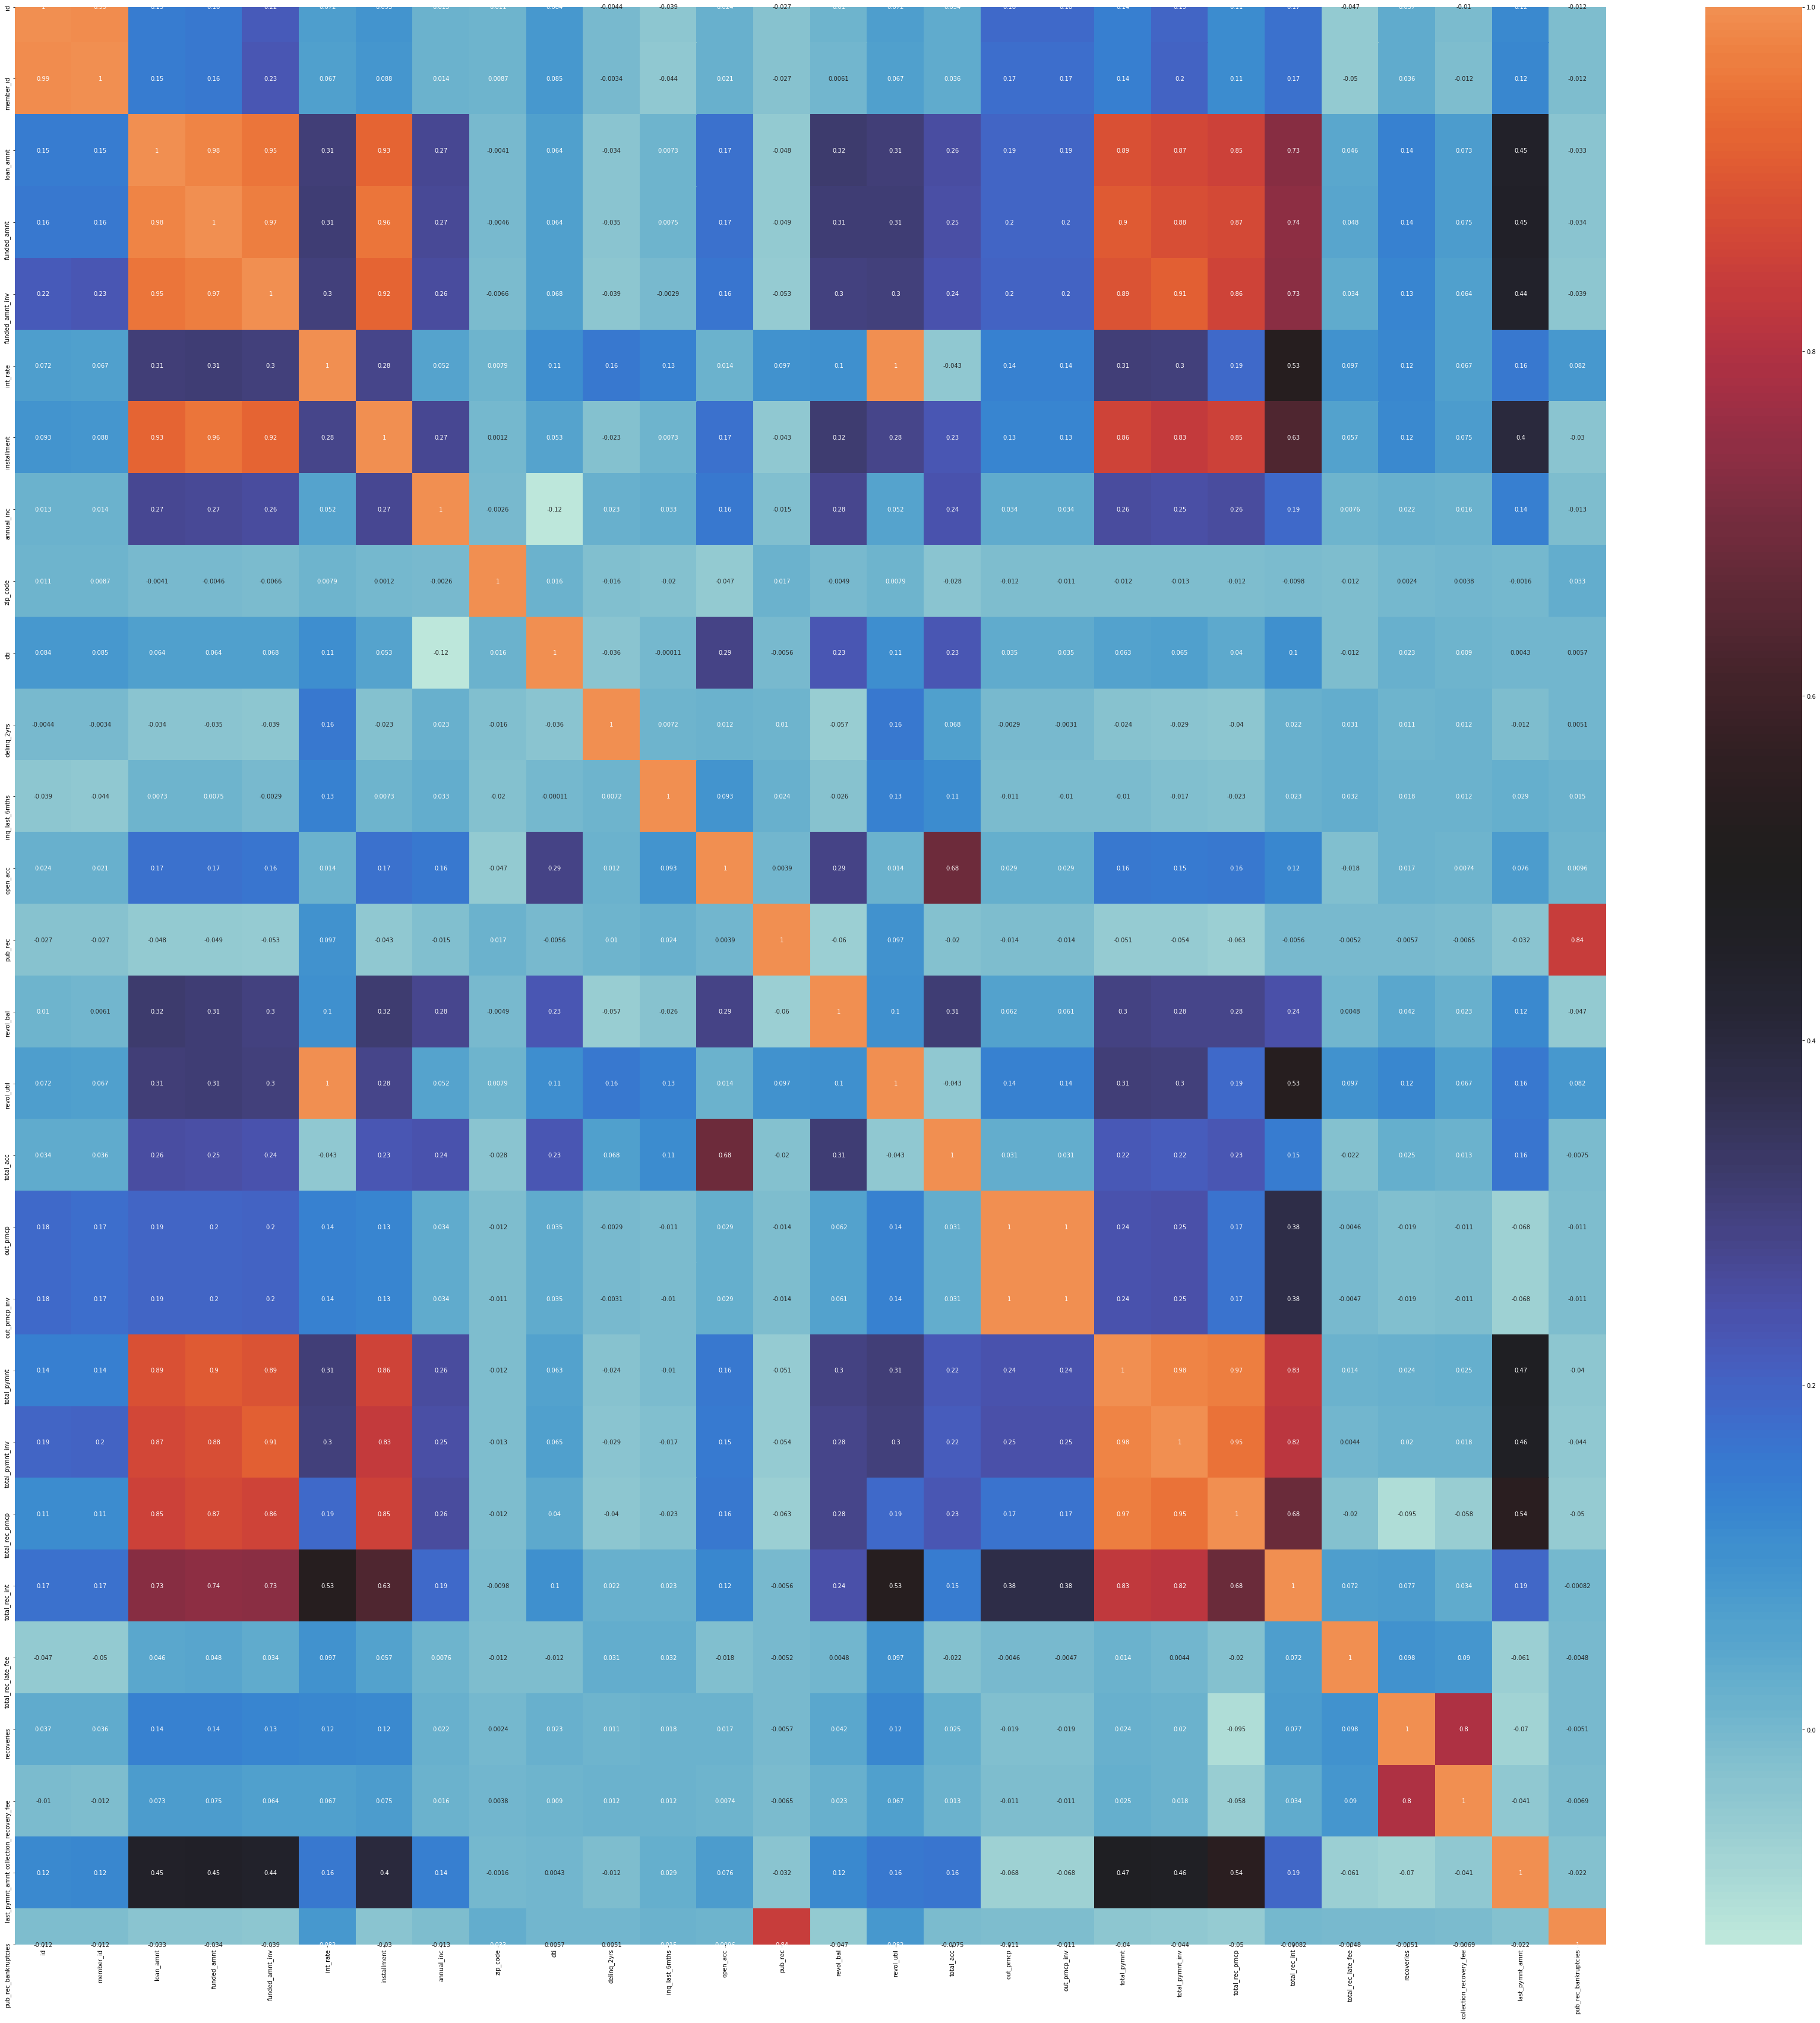

In [69]:



loan_data_corr = loan.corr()
plt.figure(figsize=(60, 60))

sns.heatmap(loan_data_corr, 
            xticklabels = loan_data_corr.columns.values,
            yticklabels = loan_data_corr.columns.values,
            annot = True,center=0.5);
sns.set_context("paper",font_scale=3, rc={"font.size":20,"axes.titlesize":50,"axes.labelsize":60})
plt.show()



In [70]:
loan_sts=(loan.loan_status.value_counts()/loan['loan_status'].count())*100

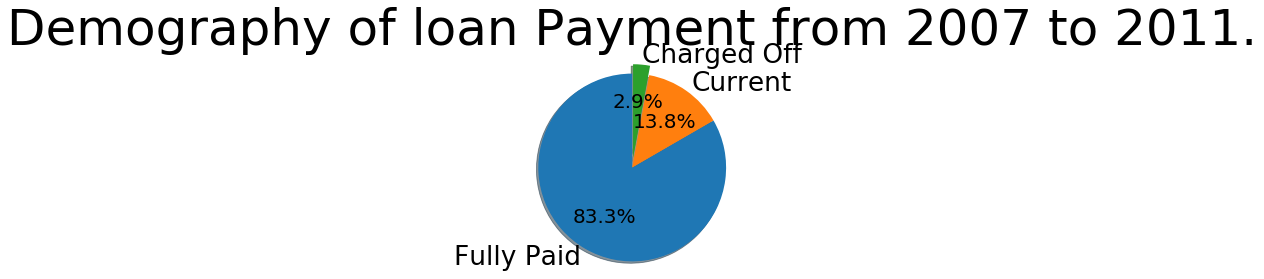

In [71]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Fully Paid', 'Current','Charged Off'
explode = (0, 0, 0.1)  # only "explode" th. 'Charged off')
fig1, ax1 = plt.subplots()
ax1.pie(loan_sts, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Demography of loan Payment from 2007 to 2011.')
plt.show()

In [72]:
loan['last_credit_pull_d_month']= loan['last_credit_pull_d'].dt.month
loan['last_credit_pull_d_year']= loan['last_credit_pull_d'].dt.year

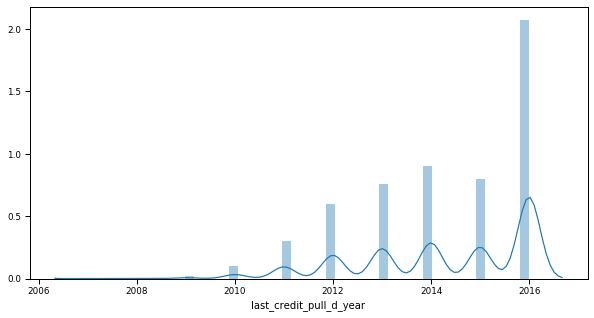

In [204]:
plt.figure(figsize=(10,5))
sns.distplot(loan['last_credit_pull_d_year'])
sns.set_context("paper",font_scale=2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":5})
plt.show()


So, these are the top 10 factors considered by a bank for Loan Acceptance or Rejection
1. CREDIT HISTORY
2. OCCUPATION
3. AGE
4. DISTANCE
5. WORK EXPERIENCE
6. SPOUSE'S INCOME SOURCE
7. REPAYMENT PERIOD
8. RELATIONSHIP WITH THE BANK
9. PURPOSE OF THE LOAN
10. SURPLUS INCOME

In [74]:
(loan.loan_status.value_counts()/loan['loan_status'].count())*100


Fully Paid     83.344349
Charged Off    13.752809
Current         2.902842
Name: loan_status, dtype: float64

So here annual_inc,delinq_2yrs,dti, open_acc against loan status contribut to Credit History of a person.Let's Analyse it.

In [75]:
loan[['annual_inc','delinq_2yrs','dti', 'open_acc','loan_status']]

annual_inc  delinq_2yrs    dti  open_acc  loan_status
0         24000.0            0  27.65         3   Fully Paid
1         30000.0            0   1.00         3  Charged Off
2         12252.0            0   8.72         2   Fully Paid
3         49200.0            0  20.00        10   Fully Paid
4         80000.0            0  17.94        15      Current
...           ...          ...    ...       ...          ...
39562     35000.0            0   7.51        11   Fully Paid
39573     63500.0            0   8.50         9   Fully Paid
39623     39000.0            0   5.08         9  Charged Off
39666     40000.0            0  13.50        13  Charged Off
39680     36153.0            0   7.47         3   Fully Paid

[37825 rows x 5 columns]

In [76]:
loan['annual_inc'].describe()

count    3.782500e+04
mean     6.967560e+04
std      6.365015e+04
min      4.000000e+03
25%      4.190000e+04
50%      6.000000e+04
75%      8.350000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [77]:
 cuts = np.arange(0, 6000000, 50000)
print(cuts)

[      0   50000  100000  150000  200000  250000  300000  350000  400000
  450000  500000  550000  600000  650000  700000  750000  800000  850000
  900000  950000 1000000 1050000 1100000 1150000 1200000 1250000 1300000
 1350000 1400000 1450000 1500000 1550000 1600000 1650000 1700000 1750000
 1800000 1850000 1900000 1950000 2000000 2050000 2100000 2150000 2200000
 2250000 2300000 2350000 2400000 2450000 2500000 2550000 2600000 2650000
 2700000 2750000 2800000 2850000 2900000 2950000 3000000 3050000 3100000
 3150000 3200000 3250000 3300000 3350000 3400000 3450000 3500000 3550000
 3600000 3650000 3700000 3750000 3800000 3850000 3900000 3950000 4000000
 4050000 4100000 4150000 4200000 4250000 4300000 4350000 4400000 4450000
 4500000 4550000 4600000 4650000 4700000 4750000 4800000 4850000 4900000
 4950000 5000000 5050000 5100000 5150000 5200000 5250000 5300000 5350000
 5400000 5450000 5500000 5550000 5600000 5650000 5700000 5750000 5800000
 5850000 5900000 5950000]


In [78]:
loan['annual_inc_range']=pd.cut(loan['annual_inc'], cuts)

In [79]:
loan[['annual_inc_range','loan_status']]

annual_inc_range  loan_status
0           (0, 50000]   Fully Paid
1           (0, 50000]  Charged Off
2           (0, 50000]   Fully Paid
3           (0, 50000]   Fully Paid
4      (50000, 100000]      Current
...                ...          ...
39562       (0, 50000]   Fully Paid
39573  (50000, 100000]   Fully Paid
39623       (0, 50000]  Charged Off
39666       (0, 50000]  Charged Off
39680       (0, 50000]   Fully Paid

[37825 rows x 2 columns]

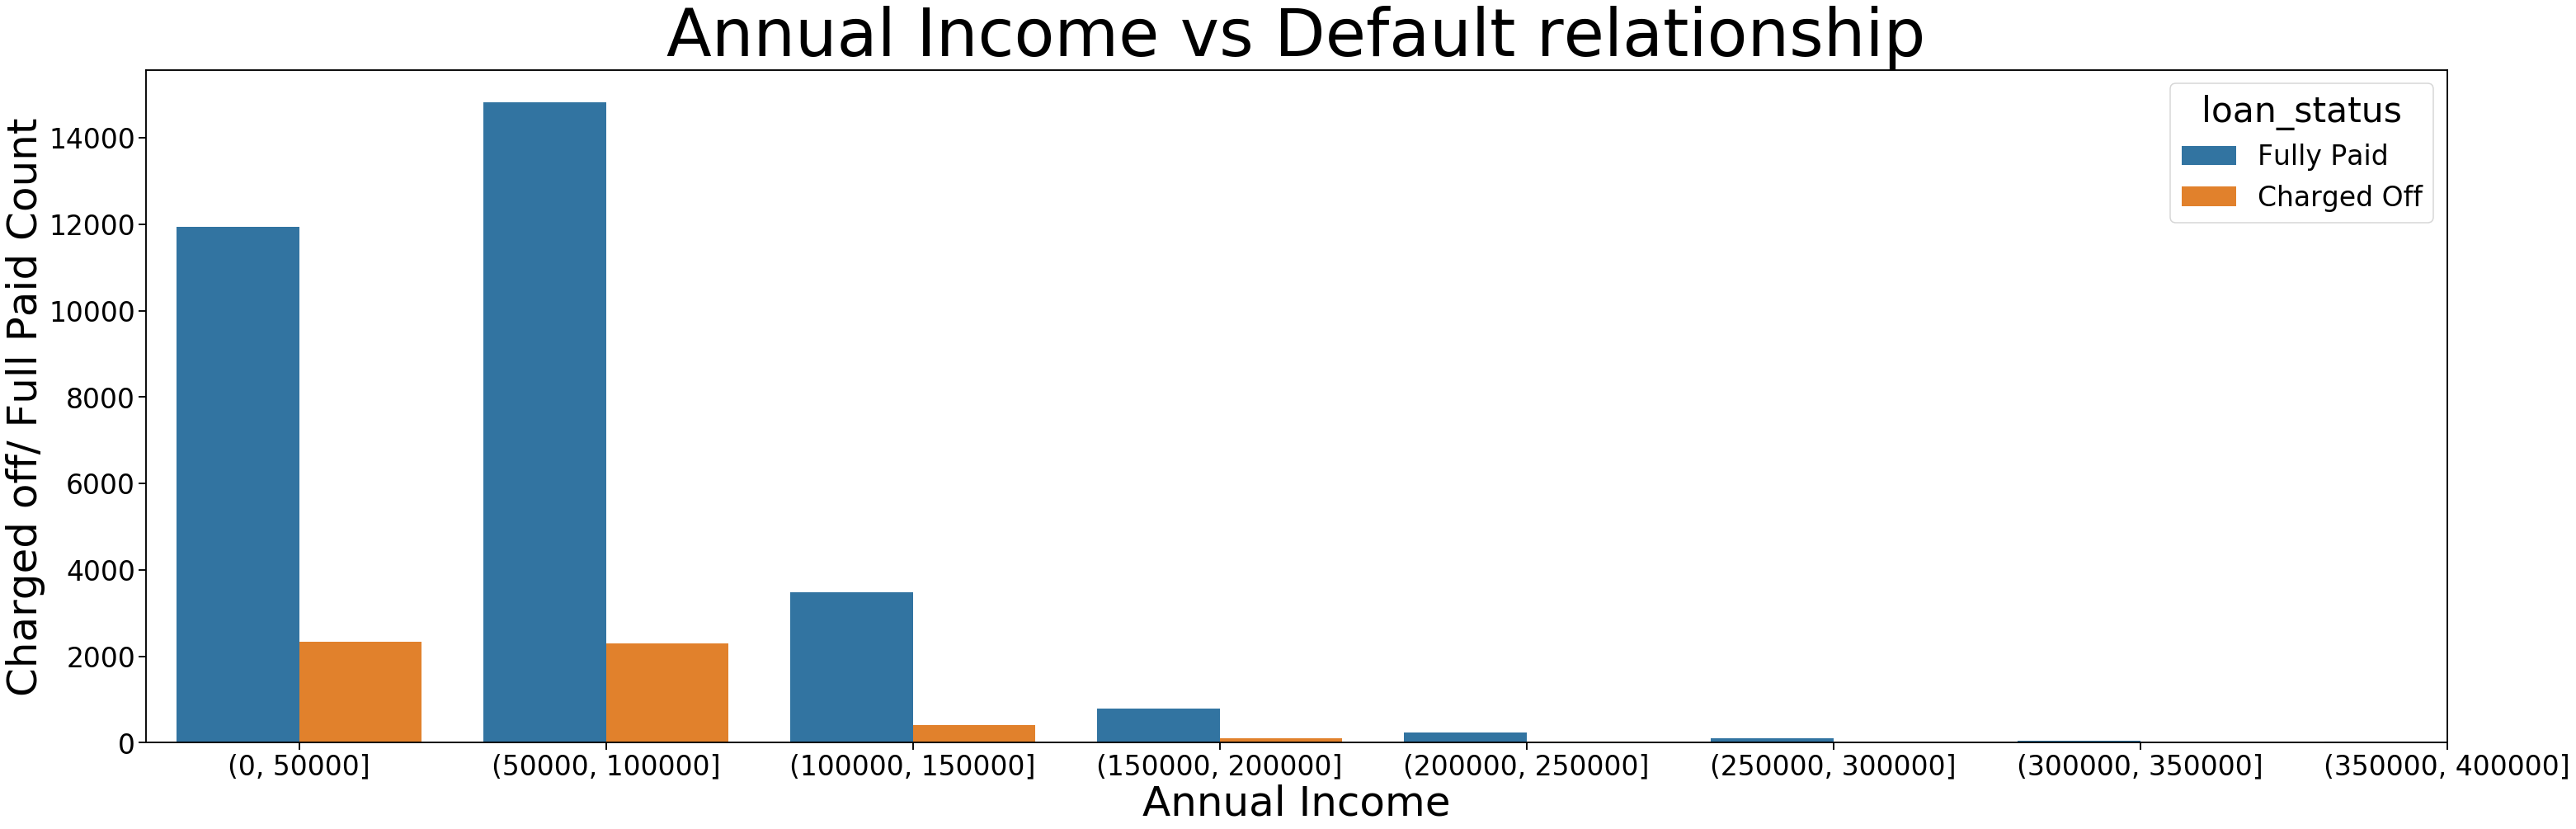

In [223]:
plt.figure(figsize=(50,15))
lm=sns.countplot(x='annual_inc_range',hue='loan_status',data=loan)
sns.set_context("talk",font_scale=2, rc={"font.size":8,"axes.titlesize":80,"axes.labelsize":50})  
axes = lm.axes
axes.set_xlim(-0.5,7)
axes.set_ylim(0,)
#sns.set_style("whitegrid")
plt.ylabel("Charged off/ Full Paid Count")
plt.xlabel("Annual Income")
plt.title("Annual Income vs Default relationship")
plt.show()

**Conclusion- Thus most of the people with annual income 0-50000 are likely to be charged -off.
People with Annual salary of 500000 to 1000000 tend to take most of the loans and are more likely 
to pay their installaments on time then getting charged-off**

In [81]:
 salary_range=pd.cut(loan['annual_inc'], cuts).value_counts()

In [82]:
salary_range=salary_range[salary_range!=0]
display(salary_range)
salary_range.shape

(50000, 100000]       17682
(0, 50000]            14608
(100000, 150000]       4029
(150000, 200000]        943
(200000, 250000]        273
(250000, 300000]        124
(300000, 350000]         51
(350000, 400000]         30
(450000, 500000]         12
(400000, 450000]         11
(500000, 550000]          9
(700000, 750000]          8
(750000, 800000]          8
(550000, 600000]          7
(600000, 650000]          5
(850000, 900000]          5
(1150000, 1200000]        5
(650000, 700000]          4
(800000, 850000]          2
(1350000, 1400000]        1
(900000, 950000]          1
(3850000, 3900000]        1
(1750000, 1800000]        1
(1050000, 1100000]        1
(1200000, 1250000]        1
(1850000, 1900000]        1
(1400000, 1450000]        1
Name: annual_inc, dtype: int64

(27,)

In [83]:
loan['defaulted'] = loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                 Not Known  10+ years   
1     15.27        59.83     C        C4                     Ryder     0 year   
2     15.96        84.33     C        C5                 Not Known  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
4           RENT     80000.0     Source Verified 2011-12-01      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

          purpose                 title  zip_code addr_state    dti  \
0     credit_card              Computer     86000         AZ  27.65   
1             car                  bike     30900         GA   1.00   
2  small_business  real estate business     60600         IL   8.72   
3           other              personel     91700         CA  20.00   
4           other              Personal     97200         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0       1985-01-01               1         3        0      13648   
1            0       1999-04-01               5         3        0       1687   
2            0       2001-11-01               2         2        0       2956   
3            0       1996-02-01               1        10        0       5598   
4            0       1996-01-01               0        15        0      27783   

   revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0       10.65          9       0.00           0.00   5863.155187   
1       15.27          4       0.00           0.00   1008.710000   
2       15.96         10       0.00           0.00   3005.666844   
3       13.49         37       0.00           0.00  12231.890000   
4       12.69         38     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00   2015-01-01           171.62   
1      117.08                     1.11   2013-04-01           119.66   
2        0.00                     0.00   2014-06-01           649.91   
3        0.00                     0.00   2015-01-01           357.48   
4        0.00                     0.00   2016-05-01            6

In [84]:
loan.loan_status.value_counts()

Fully Paid     31525
Charged Off     5202
Current         1098
Name: loan_status, dtype: int64

As, Our purpose is to find differences in the features between loans that have been either fully paid or charged off.So the loans which . So we only keep the loans with status "Fully Paid" or "Charged Off."


In [85]:
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape

(35367, 42)

(35367, 42)

In [86]:
loan['delinq_2yrs'].unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

In [87]:
delinquencies =loan.delinq_2yrs.value_counts(normalize=True)*100

print(delinquencies)

0     89.163286
1      8.320854
2      1.723528
3      0.536390
4      0.149754
5      0.057179
6      0.027228
7      0.010891
8      0.005446
11     0.002723
9      0.002723
Name: delinq_2yrs, dtype: float64


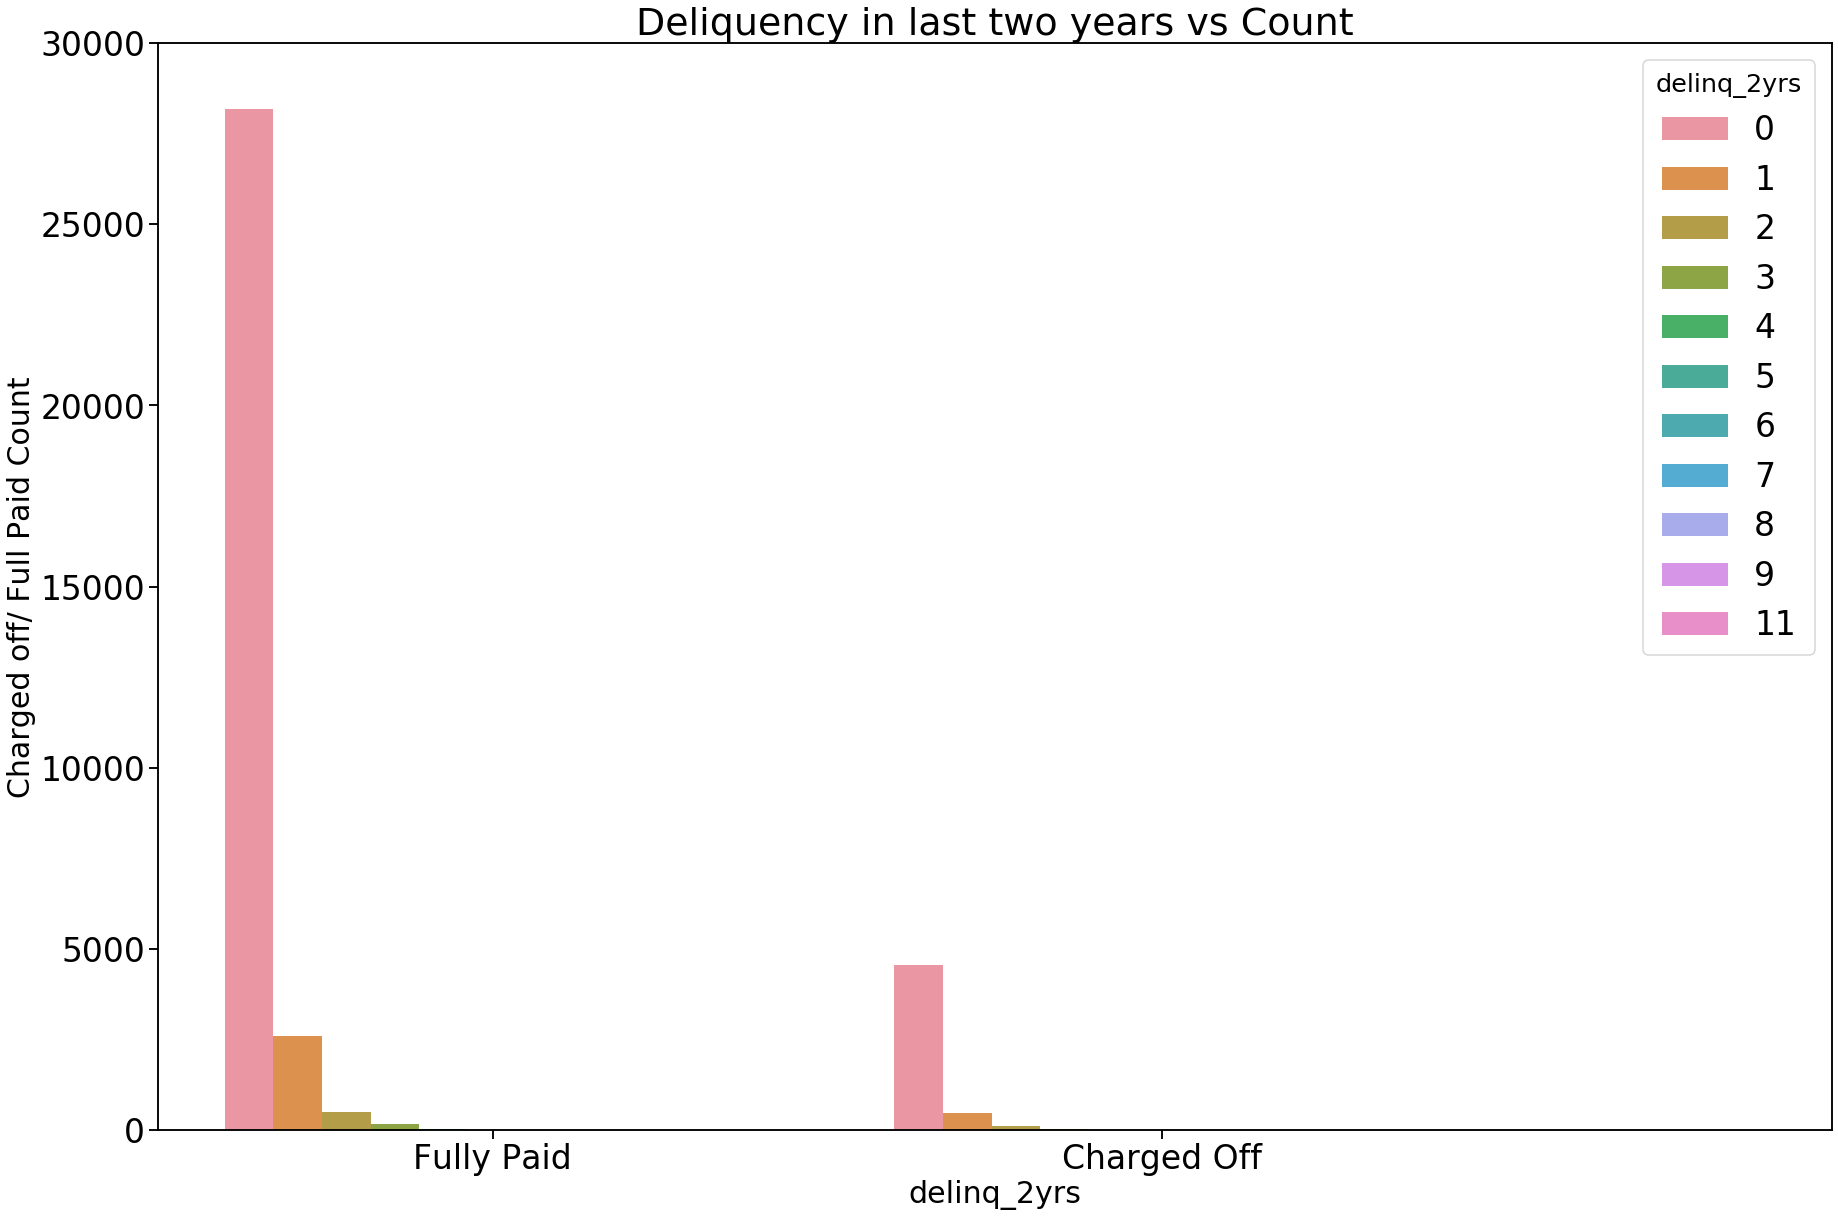

In [208]:
plt.figure(figsize=(30,20))
lm=sns.countplot(x='loan_status',hue='delinq_2yrs',data=loan)
sns.set_context("talk",font_scale=2, rc={"font.size":8,"axes.titlesize":38,"axes.labelsize":30})  
axes = lm.axes
axes.set_xlim(-0.5,2)
axes.set_ylim(0,30000)
#sns.set_style("whitegrid")
plt.ylabel("Charged off/ Full Paid Count")
plt.xlabel("delinq_2yrs")
plt.title("Deliquency in last two years vs Count")
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


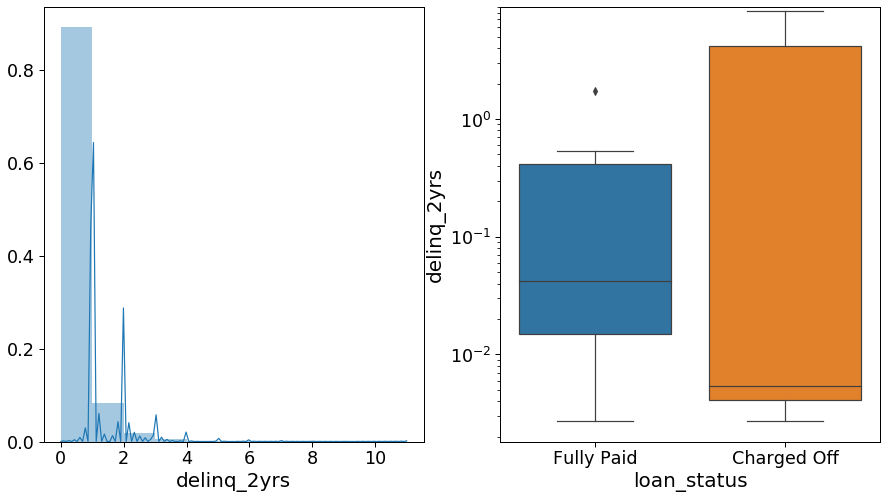

In [214]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
ax = sns.distplot(loan['delinq_2yrs'],bins = 11)
plt.subplot(1, 2, 2)
bax=sns.boxplot(y=delinquencies, x='loan_status', data=loan)
sns.set_context("paper",font_scale=2, rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":20})  
#plt.xscale('log')
bax.set_yscale('log')
axes=bax.axes
axes.set_ylim(0,9)
plt.show()

So Let's remove outliers from box plot. 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


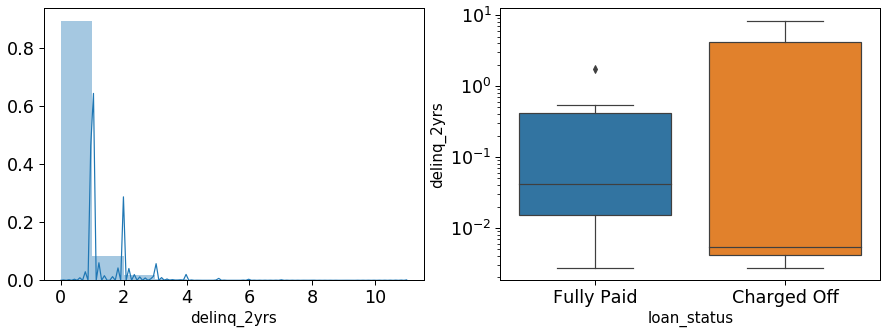

In [90]:
delinquencies=delinquencies[delinquencies<89]
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loan['delinq_2yrs'],bins = 11)
plt.subplot(1, 2, 2)
bax=sns.boxplot(y=delinquencies, x='loan_status', data=loan)
sns.set_context("paper",font_scale=2, rc={"font.size":30,"axes.titlesize":50,"axes.labelsize":10})  
#plt.xscale('log')
bax.set_yscale('log')
#axes=bax.axes
axes.set_ylim(0,9)
plt.show()

* Thus there are less chance of getting charged off due to deliquency in last two years. At max a person has 2 deliquencies in last two years and even after that the percentage offull paid is more.

### Analysis of dti vs loan_status
Now we'll analyse dti corresponding to loan status. A debt-to-income ratio (DTI) is a personal finance measure that compares the amount of debt you have to your overall income. Lenders, including issuers of mortgages, use it as a way to measure your ability to manage the payments you make each month and repay the money you have borrowed.A

In [91]:
loan.dti.describe()

count    36727.000000
mean        13.337557
std          6.649275
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


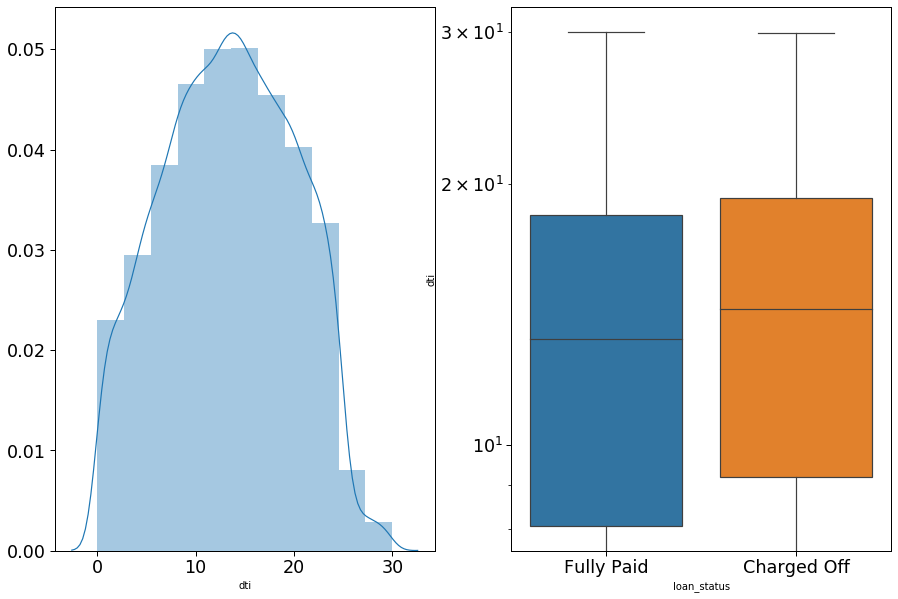

In [92]:
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
ax = sns.distplot(loan['dti'],bins = 11)
plt.subplot(1, 2, 2)
bax=sns.boxplot(y='dti', x='loan_status', data=loan)
sns.set_context("paper",font_scale=2, rc={"font.size":30,"axes.titlesize":50,"axes.labelsize":10})  
#plt.xscale('log')
bax.set_yscale('log')
#axes=bax.axes
axes.set_ylim(0,9)
plt.show()

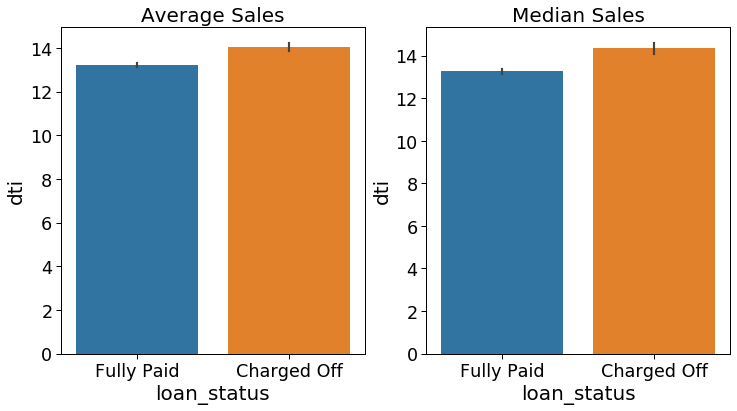

In [215]:
# subplot 1 :mean dti variation with loan_status
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='loan_status', y='dti', data=loan)
plt.title("Average Sales")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='loan_status', y='dti', data=loan, estimator=np.median)
plt.title("Median Sales")

plt.show()


**Conclusion:**
Conclusion from dti vs loan status plot- As the mean of charged off loans is higher as compared to fully paid loans. Thus people with a history of higher debt-to income ratio are more likely to end up with being charged off. 

### Open Account Analysis V/S Loan Status
The open account definition is an account which remains to be paid. 

In [94]:
loan.open_acc.describe()

count    36727.000000
mean         9.305824
std          4.375760
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


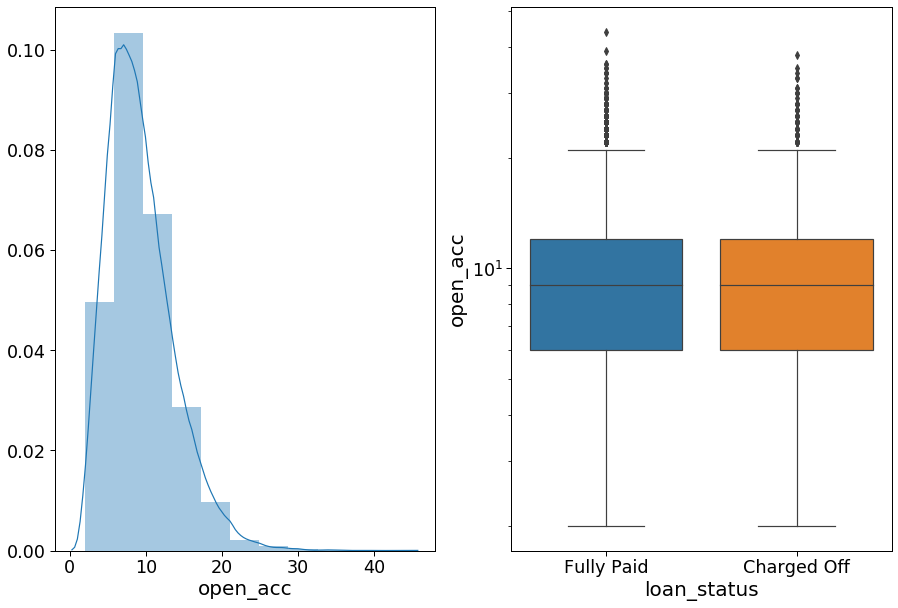

In [216]:
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
ax = sns.distplot(loan['open_acc'],bins = 11)
plt.subplot(1, 2, 2)
bax=sns.boxplot(y='open_acc', x='loan_status', data=loan)
sns.set_context("paper",font_scale=2, rc={"font.size":30,"axes.titlesize":50,"axes.labelsize":10})  
#plt.xscale('log')
bax.set_yscale('log')
#axes=bax.axes
axes.set_ylim(0,9)
plt.show()

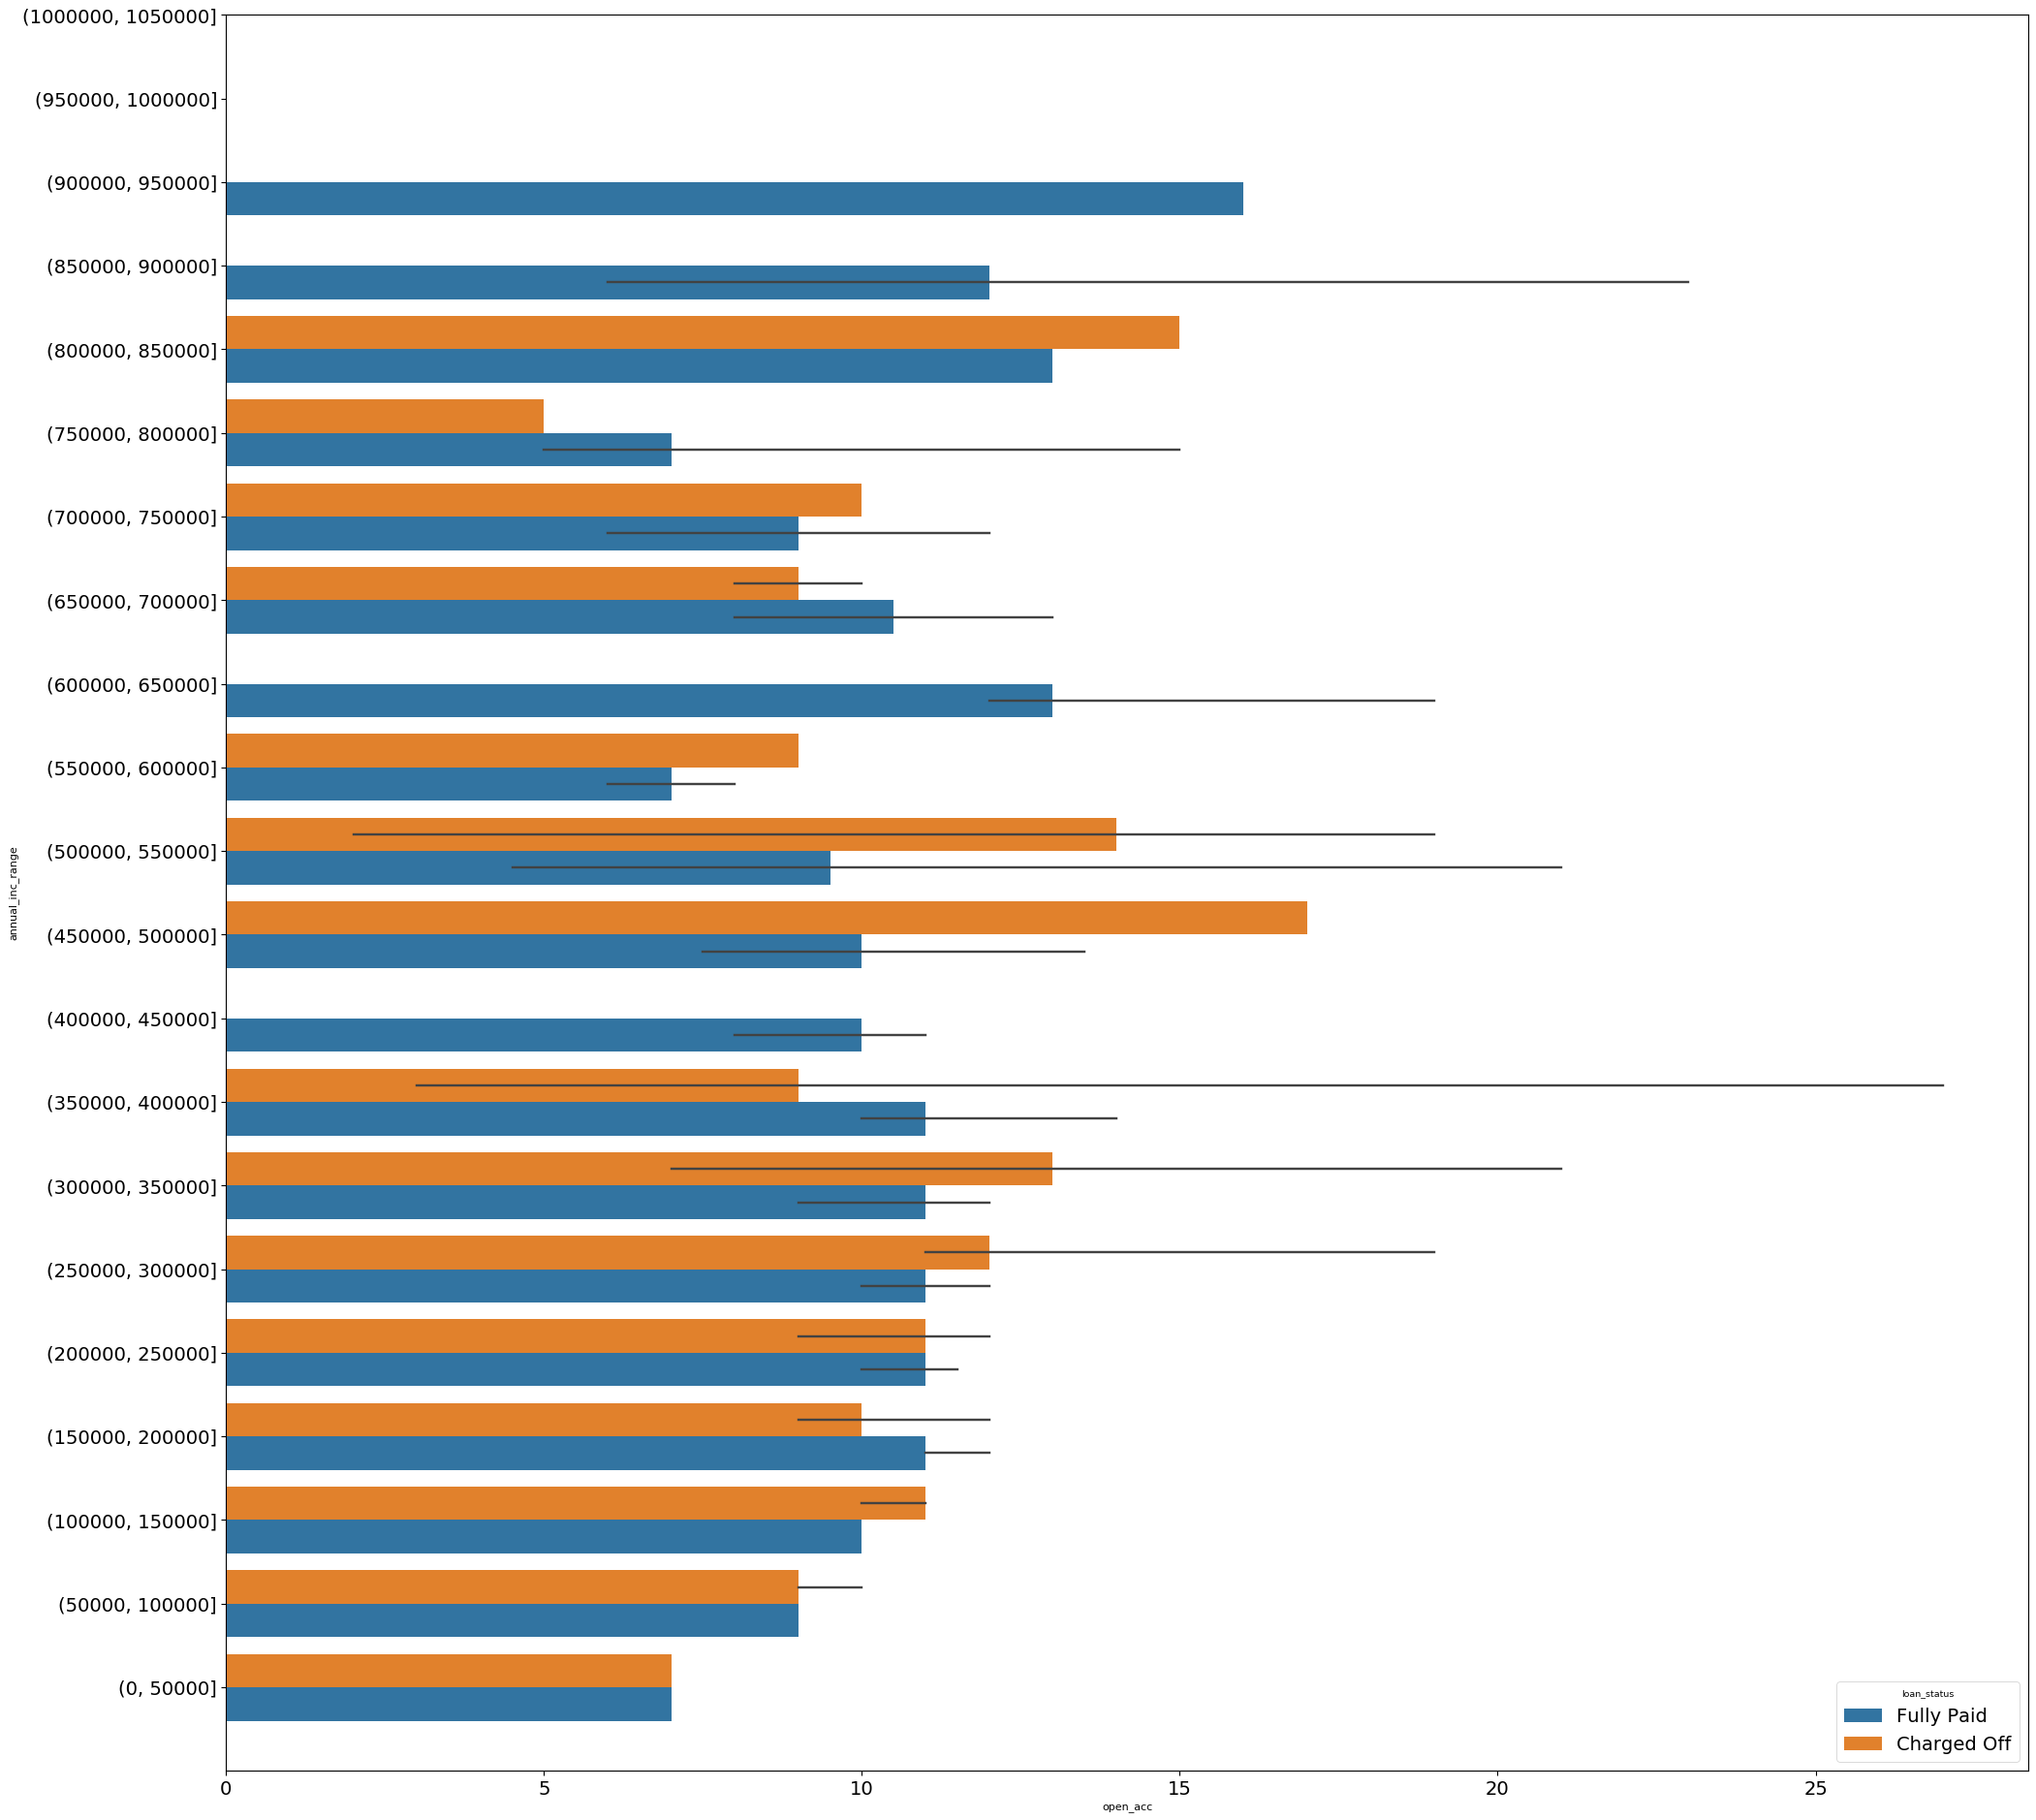

In [218]:
# set figure size for larger figure
plt.figure(num=None, figsize=(30, 30), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
lm=sns.barplot(y='annual_inc_range', x='open_acc', hue="loan_status", data=loan, estimator=np.median)
axes=lm.axes
axes.set_ylim(-1,20)
sns.set_context("paper",font_scale=2, rc={"font.size":30,"axes.titlesize":50,"axes.labelsize":10}) 
plt.show()

**Conclusion:**
Thus people with salary 45000 to 55000 have more number of open accounts and more likely to charge off loan. No of open accounts increase from 0 salary to 5,00,000 and then decrease till 800000.

## 2.) OCCUPATION

Now let's analyse how occupation impacts loan payment. Let's again analyse what columns are associated wit

In [97]:
m=Data_Dictionary[Data_Dictionary['LoanStatNew'].isin(columns_leftout_loan)]
m.style.set_properties(subset=['Description'], **{'width': '300px'})

Thus emp_title is an important factor to analyse that a person will be able to pay his her loan or not.

There are some occupations that banks prefer. For example, in many government banks, government and PSU employees are most preferred as they have a stable job. After government employees, banks prefer people working with blue-chip companies and doctors. Further down the line come chartered accountants, engineers and lawyers. People working in private companies and self-employed get the lowest scores. Occupation is one of the important factors taken into consideration while appraising a home loan. 

In [98]:
top10_emp_title = loan.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

Not Known            1360
US Army               128
Bank of America       106
IBM                    65
AT&T                   57
Kaiser Permanente      55
Wells Fargo            52
USAF                   51
UPS                    51
US Air Force           50
Name: emp_title, dtype: int64

However, Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.here we can see that different companies are mentioned and almost all values are unique so we can't simply judge any defaults from this variable.

3.) Third Factor is Age and we do not have any field to anlyse the same so let's move on to another field i.e Distance.Banks also considered the **distance** of the property from the financing branch while sanctioning a loan. For example, according to one of the public sector banks, a property within city municipality limits or in the same city or town is the most preferred. If the property is very far, banks tend to hesitate in approving a loan.

In [99]:
loan.zip_code.nunique()

808

## 4. Distance

**Column to be analysed: zip_code and addr_state**

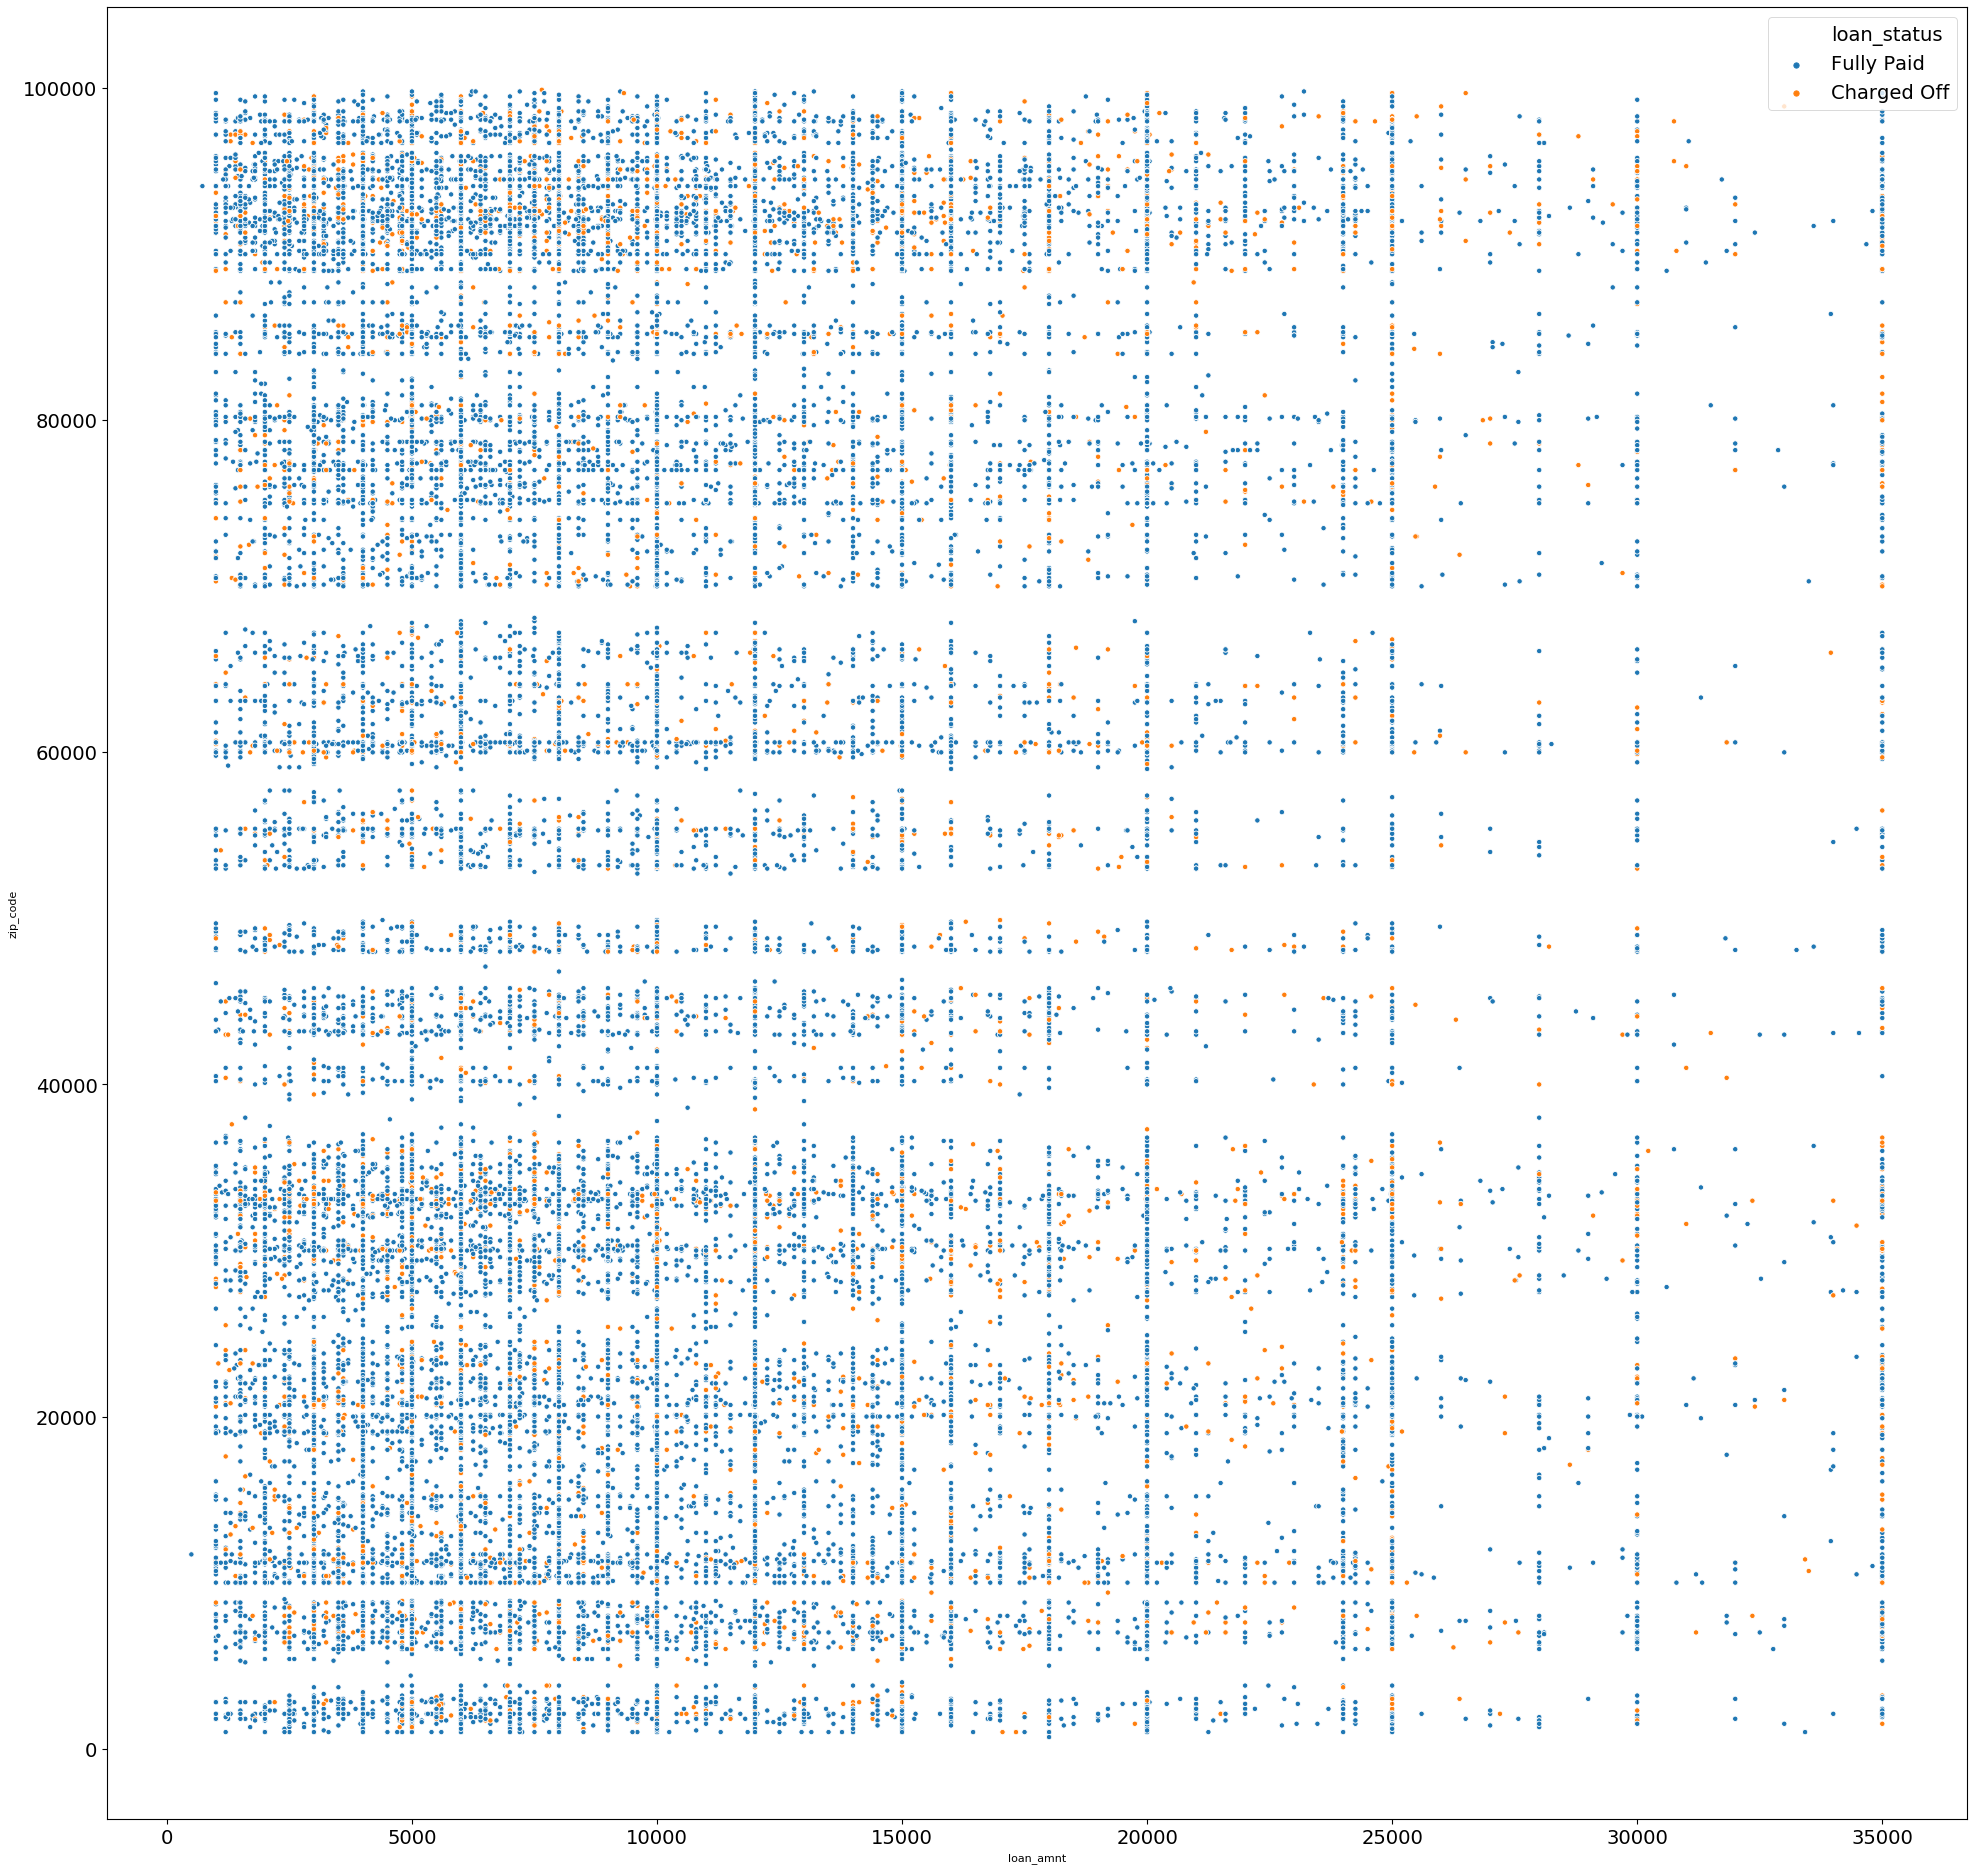

In [100]:
plt.figure(num=None, figsize=(30, 30), dpi=80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x="loan_amnt", y="zip_code", hue="loan_status",
                  data=loan)
plt.show()

In [101]:
loan.addr_state.value_counts(normalize=True).head(10)

CA    0.181311
NY    0.095352
FL    0.071773
TX    0.069322
NJ    0.047023
IL    0.038854
PA    0.038745
VA    0.035478
GA    0.035178
MA    0.033463
Name: addr_state, dtype: float64

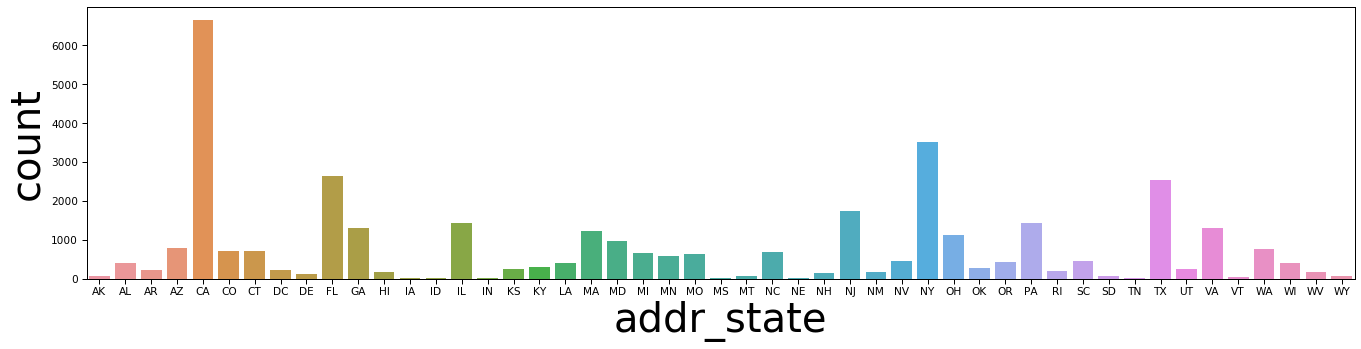

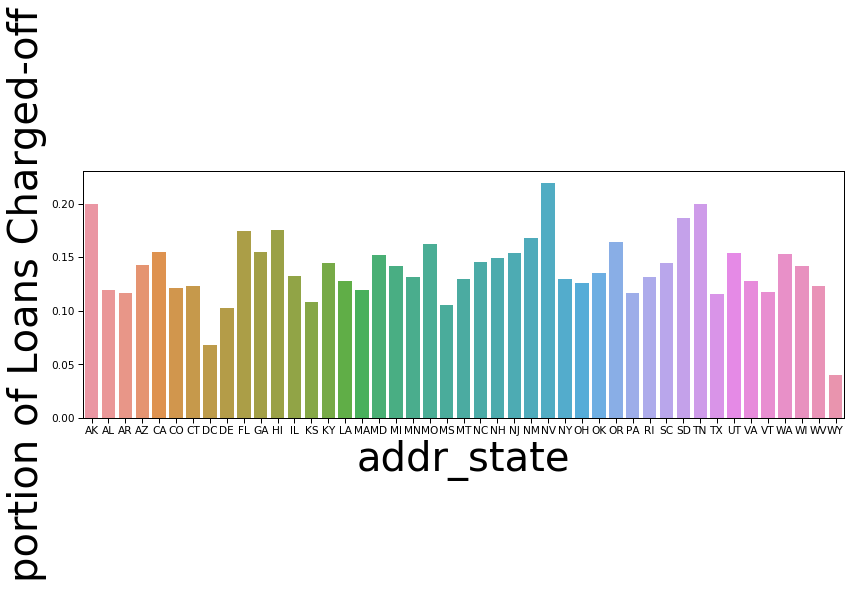

In [231]:
plt.figure(figsize=(50,5))
plt.subplot(1, 2, 1)
b=sns.countplot(loan['addr_state'], order=sorted(loan.addr_state.unique()))
sns.set_context("paper",font_scale=1.2, rc={"font.size":100,"axes.titlesize":10,"axes.labelsize":40}) 
#Fraction of loans charged off and fully Paid
charge_off_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)

a.set_ylabel('portion of Loans Charged-off')
plt.show()


**Conclusion: Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
States with higher Charge Off rates have very low number of loans.**

## 5. Experience

For experince , we directly have emp_length column.

In [103]:
loan.emp_length.nunique()

11

So we can directly plot it.

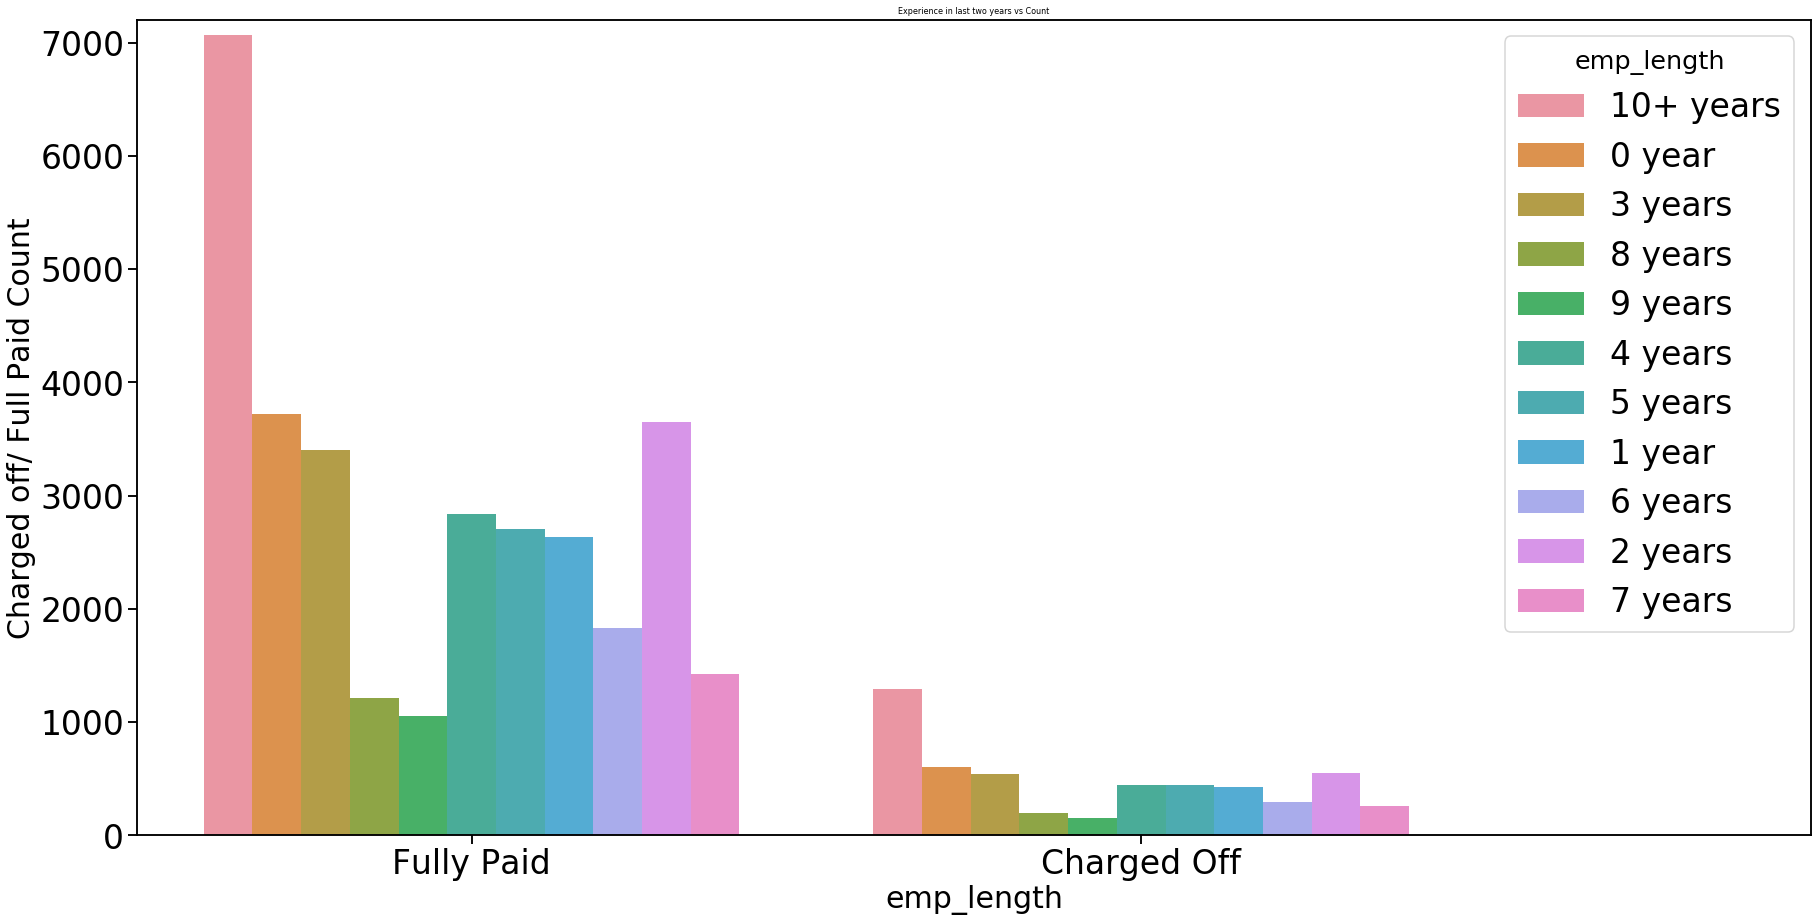

In [105]:
plt.figure(figsize=(30,15))
lm=sns.countplot(x='loan_status',hue='emp_length',data=loan)
sns.set_context("talk",font_scale=2, rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":30})  
axes = lm.axes
axes.set_xlim(-0.5,2)
axes.set_ylim(0,7200)
#sns.set_style("whitegrid")
plt.ylabel("Charged off/ Full Paid Count")
plt.xlabel("emp_length")
plt.title("Experience in last two years vs Count")
plt.show()

**Conclusion:Thus people with more experience are 10+ years experince are more likely to charge-off the loan. One hypothesis can be that these people are likely to retire soon and thus have less time to pay loan.**

## 7. Repayment period.

The shorter the repayment period, the more your bank likes you. For example, several banks give maximum score to people who opt for a repayment period of up to five years. It falls to half if the repayment period is between 10 and 15 years.

So we have a column 'term' which we can use to see why less period of loan is more preferred. Moreover , interest rate increases with the period of loan. So let's observe if that is happening in our data as well.

In [106]:
loan.term.value_counts()

 36 months    27491
 60 months     9236
Name: term, dtype: int64

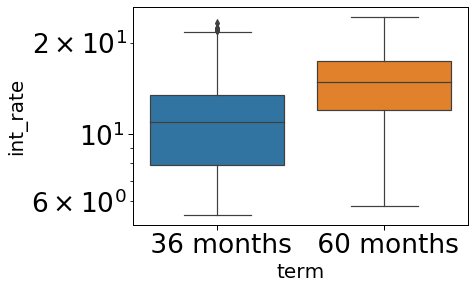

In [108]:



# boxplot of a variable
sns.boxplot(y=loan['int_rate'] ,x=loan['term'])
sns.set_context("paper",font_scale=3, rc={"font.size":5,"axes.titlesize":15,"axes.labelsize":20})  
plt.yscale('log')
plt.show()


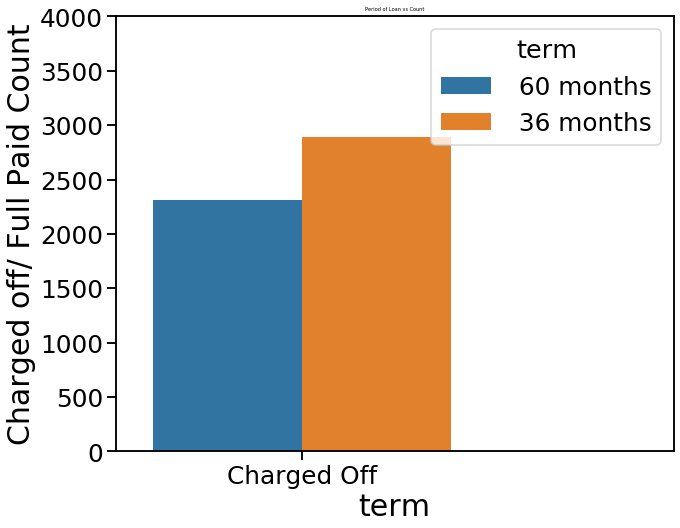

In [233]:
charged_off_loans_count=loan.loc[loan['loan_status']=='Charged Off']
plt.figure(figsize=(10,8))
lm=sns.countplot(x='loan_status',hue='term',data=charged_off_loans_count)
sns.set_context("talk",font_scale=1.5, rc={"font.size":8,"axes.titlesize":5,"axes.labelsize":30})  
axes = lm.axes
axes.set_xlim(-0.5,1)
axes.set_ylim(0,4000)
#sns.set_style("whitegrid")
plt.ylabel("Charged off/ Full Paid Count")
plt.xlabel("term")
plt.title("Period of Loan vs Count")
plt.show()

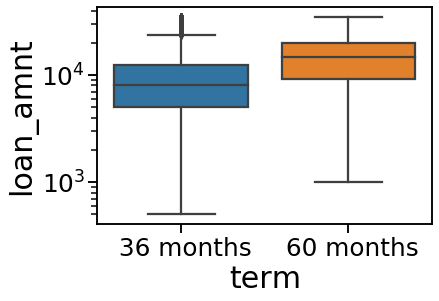

In [113]:
sns.boxplot(y=loan['loan_amnt'] ,x=loan['term'])
ax=sns.set_context("paper",font_scale=2, rc={"font.size":30,"axes.titlesize":5,"axes.labelsize":5})
plt.yscale('log')
plt.show()

**Column to be Analysed: installment**
Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

In [114]:
loan.installment.describe()

count    36727.000000
mean       325.014427
std        208.852376
min         16.080000
25%        167.730000
50%        280.410000
75%        429.450000
max       1305.190000
Name: installment, dtype: float64

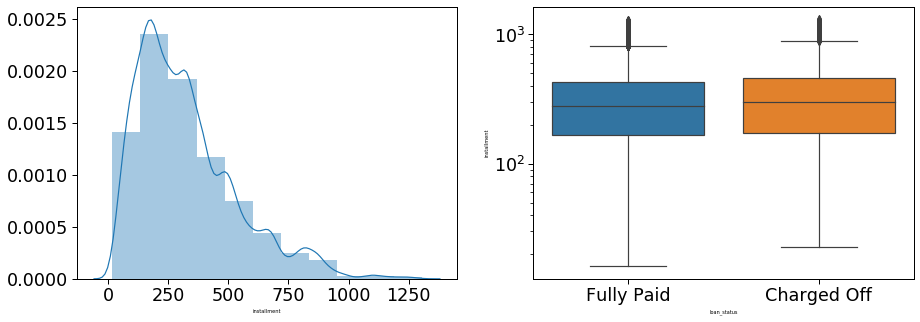

In [115]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loan['installment'],bins = 11)
plt.subplot(1, 2, 2)
bax=sns.boxplot(y='installment', x='loan_status', data=loan)
sns.set_context("paper",font_scale=2, rc={"font.size":30,"axes.titlesize":50,"axes.labelsize":20})  
#plt.xscale('log')
bax.set_yscale('log')
#axes=bax.axes
axes.set_ylim(0,9)
plt.show()

In [116]:
loan.groupby('loan_status')['installment'].describe()

count        mean         std    min     25%     50%     75%  \
loan_status                                                                   
Charged Off   5202.0  339.548552  215.850095  22.79  172.38  297.53  460.10   
Fully Paid   31525.0  322.616124  207.580732  16.08  167.08  278.17  424.56   

                 max  
loan_status           
Charged Off  1305.19  
Fully Paid   1295.21

**Conclusion: Thus we can conclude according to our data that number of charge-off's for 36 months is much higher as compared to 36 months. Also loan amount is also likely to be higher for 60 months as compared to 36 months.**

**installment amount varies largely between 22 to 1305 with median of 296
loans Charged Off have high installment on average**

-------------

**Column to be analysed: loan_amnt and Verification**

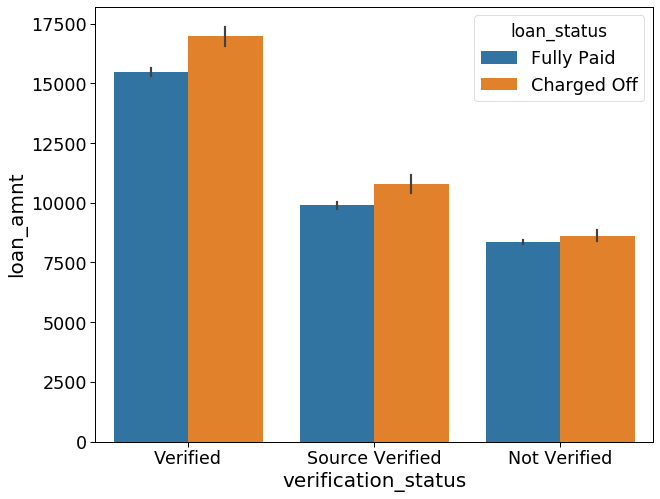

In [117]:
plt.figure(figsize=(10,8))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
ax=sns.set_context("paper",font_scale=1, rc={"font.size":30,"axes.titlesize":60,"axes.labelsize":30})

**Conclusion: Higher loan amounts are more likely to go under verification. Verified loans are less likely to be defaulted as compared to source verified and non-verified loans.**

In [118]:
loan.verification_status.value_counts()

Not Verified       15517
Verified           11744
Source Verified     9466
Name: verification_status, dtype: int64

Text(0.5, 0, 'verification_status')

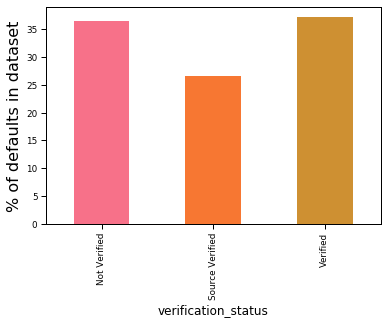

In [119]:
values = (loan.loc[loan['loan_status']=='Charged Off']['verification_status'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of defaults in dataset', fontsize=16)
ax.set_xlabel('verification_status', fontsize=12)

**Conclusion: It appears that non verified loans are more as compared to verified loans . So Lending club should take action against it.**

-------------

**Columns to be Analysed: grade and sub_grade**


In [120]:
loan.grade.value_counts()

B    11133
A     9511
C     7451
D     4836
E     2566
F      938
G      292
Name: grade, dtype: int64

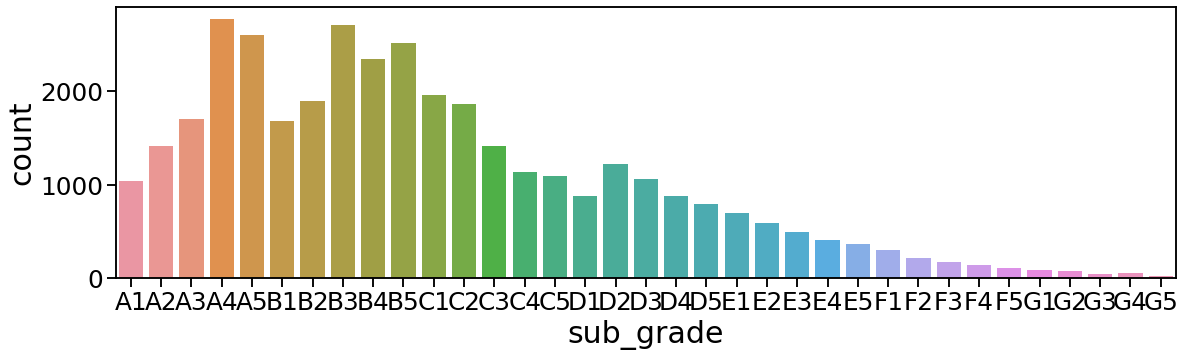

Text(0.5, 0, 'grade')

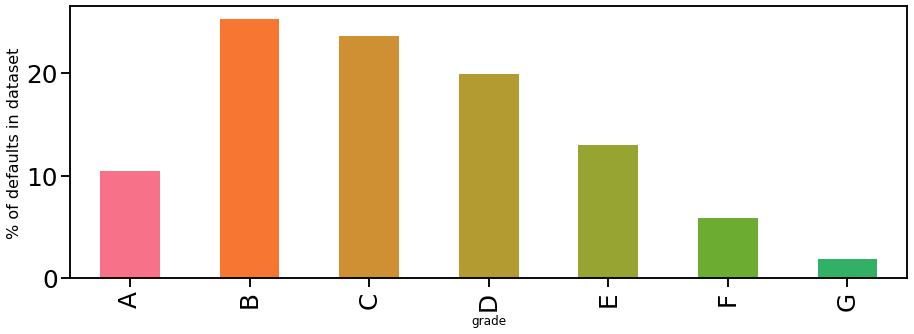

In [240]:
loan.sub_grade.value_counts(normalize=True).head()
plt.figure(figsize=(19,5))
sns.countplot(loan['sub_grade'], order=sorted(loan.sub_grade.unique()))
plt.show()
plt.figure(figsize=(15,5))
values = (loan.loc[loan['loan_status']=='Charged Off']['grade'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of defaults in dataset', fontsize=16)
ax.set_xlabel('grade', fontsize=12)

F & G are more safe to avoid charged-off loans.

Text(0.5, 0, 'home_ownership')

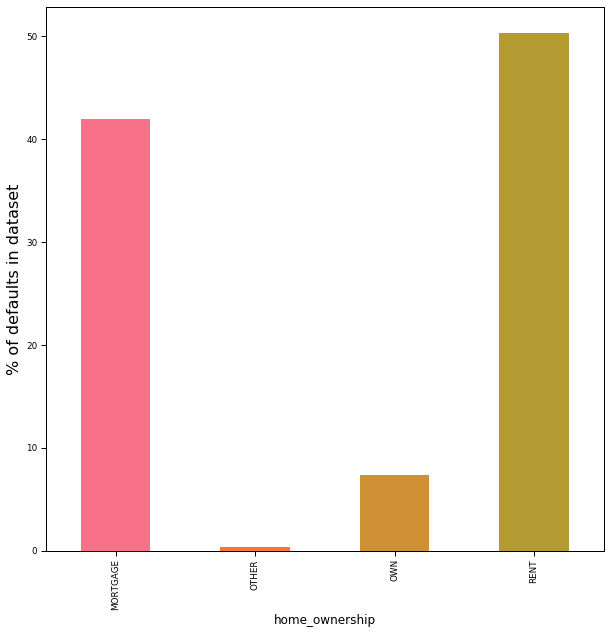

In [122]:
plt.figure(figsize=(10,10))
values = (loan.loc[loan['loan_status']=='Charged Off']['home_ownership'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of defaults in dataset', fontsize=16)
ax.set_xlabel('home_ownership', fontsize=12)

## 9. Purpose of Loan

We have a column purpose for analysing purpose of taking loan.

In [123]:
loan.purpose.value_counts()

debt_consolidation    17343
credit_card            4796
other                  3586
home_improvement       2731
major_purchase         2049
small_business         1647
car                    1429
wedding                 887
medical                 645
moving                  541
house                   347
vacation                341
educational             292
renewable_energy         93
Name: purpose, dtype: int64

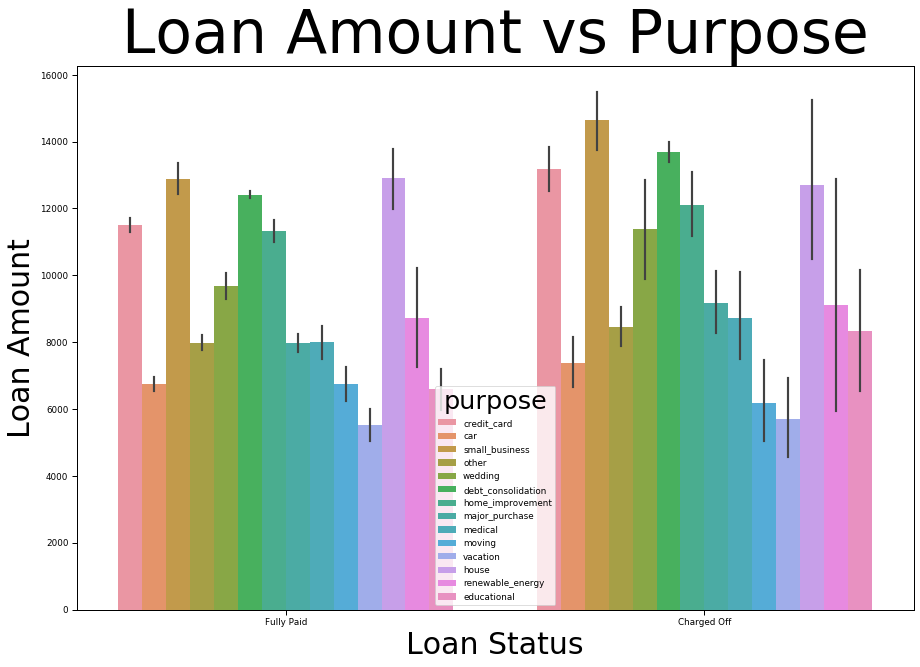

In [124]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='loan_amnt',hue='purpose',data=loan)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Purpose")
plt.show()

**Conclusion: Defaults are highest for loans opted for small businesses, followed by debt consolidation and further credit card loans. So these loans are more risky. Loans for vacation are least risky**

In [125]:
home_loan = loan[loan['purpose'].isin(['house','home_improvement'])]

In [126]:
print(home_loan)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
16     1065775    1299699      10000        10000         10000.00   
80     1068994    1303432      35000        22075         22050.00   
131    1066215    1300572      24000        24000         24000.00   
148    1068078    1302434       6000         6000          6000.00   
161    1062177    1294027      15000        15000         15000.00   
...        ...        ...        ...          ...              ...   
38962   291934     291927      25000        25000         13659.86   
38973   290605     290598      15000        15000          4441.67   
38978   288584     288373      10000        10000          5675.00   
39084   270400     270383       9000         9000          3110.87   
39259   244872     229143       3000         3000          2975.00   

             term  int_rate  installment grade sub_grade  \
16      36 months     15.27       347.98     C        C4   
80      60 months     17.27       551.8

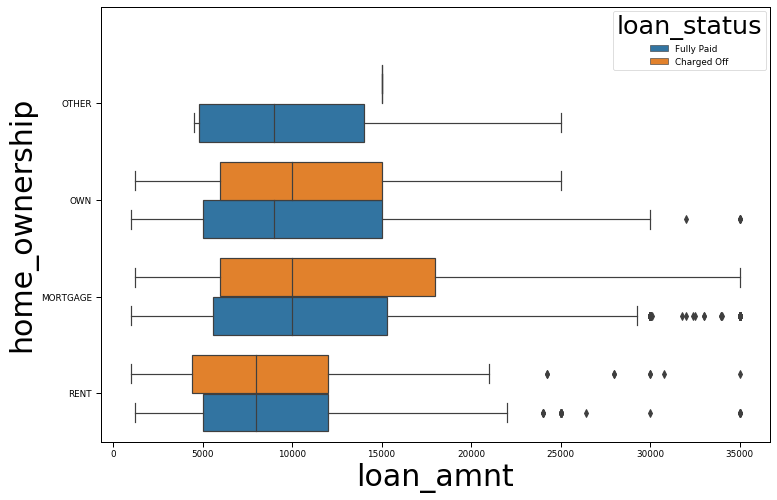

In [127]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8))

# specify hue="categorical_variable"
a=sns.boxplot(x='loan_amnt', y='home_ownership', hue='loan_status', data=home_loan)
axes=a.axes
axes.set_ylim(-0.5,4)
sns.set_context("talk",font_scale=0.7, rc={"font.size":70,"axes.titlesize":20,"axes.labelsize":10}) 
plt.show()

**Conclusion: Hence, when loans are taken for house or house improvement, then houses**

In [128]:
round(loan.isnull().sum()/len(loan.index),6)*100

id                          0.0000
member_id                   0.0000
loan_amnt                   0.0000
funded_amnt                 0.0000
funded_amnt_inv             0.0000
term                        0.0000
int_rate                    0.0000
installment                 0.0000
grade                       0.0000
sub_grade                   0.0000
emp_title                   0.0000
emp_length                  0.0000
home_ownership              0.0000
annual_inc                  0.0000
verification_status         0.0000
issue_d                     0.0000
loan_status                 0.0000
pymnt_plan                  0.0000
url                         0.0000
purpose                     0.0000
title                       0.0000
zip_code                    0.0000
addr_state                  0.0000
dti                         0.0000
delinq_2yrs                 0.0000
earliest_cr_line            0.0000
inq_last_6mths              0.0000
open_acc                    0.0000
pub_rec             

**column to be analysed - out_prncp**
-Remaining outstanding principal for total amount funded.

In [129]:

loan.out_prncp.value_counts()
loan.groupby('loan_status')['out_prncp'].describe()

count  mean  std  min  25%  50%  75%  max
loan_status                                             
Charged Off   5202.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Fully Paid   31525.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

**Conclusion:
As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Thus we can ignore out_prncp variable.**

-----------

**Column to be Analysed - total_pymnt**

In [130]:
loan.total_pymnt.describe()

count    36727.000000
mean     12020.679663
std       8849.530778
min         33.730000
25%       5590.586144
50%       9833.880000
75%      16322.698685
max      58563.679930
Name: total_pymnt, dtype: float64

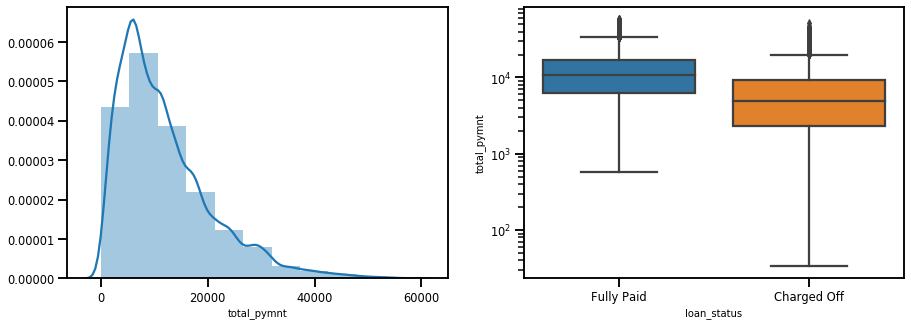

In [131]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loan['total_pymnt'],bins = 11)
plt.subplot(1, 2, 2)
bax=sns.boxplot(y='total_pymnt', x='loan_status', data=loan)
sns.set_context("paper",font_scale=2, rc={"font.size":30,"axes.titlesize":50,"axes.labelsize":10})  
bax.set_yscale('log')
axes.set_ylim(0,9)
plt.show()

-----------------------------

**Conclusion:-Average amount received is less for Charged Off then fully paid loans. Total Payment received to_date is mostly centric between 0-2000. This variable can be ignored as we are not considering current payments**

In [132]:
loan = loan.drop('total_pymnt',axis=1)

----------------

**Column to be Analysed - total_pymnt_inv
-Payments received to date for portion of total amount funded by investors.**

**Conclusion:
This variable is not useful as we are not considering current loans. We can drop this variable from analysis.**

In [133]:
loan = loan.drop('total_pymnt_inv',axis=1)

--------

**Column To be Analysed - total_rec_prncp - Principal received to date.**

**total_rec_int- Interest received to date.**
**total_rec_late_fee - Late fees received to date.**



**Conclusion:
This variable is not useful as we are not considering current loans. We can drop this variable from analysis.**

In [134]:
loan =loan.drop('total_rec_prncp',axis=1)

In [135]:
loan = loan.drop('total_rec_int',axis=1)
loan = loan.drop('total_rec_late_fee',axis=1)

-----------

**Column To be Analysed - recoveries
Data_Dictionary: post charge off gross recovery.**

**collection_recovery_fee- post charge off collection fee.
A charge-off is a debt that a creditor has given up trying to collect on after you've missed payments for several months.

Recoveries is only for the Charged Off loans.
This Variable is not useful as it is considered after the loan has been Charged Off. Lets drop this variable.


In [136]:
loan = loan.drop('recoveries',axis=1)

In [137]:
loan = loan.drop('collection_recovery_fee',axis=1)

In [138]:
loan.shape

(36727, 43)

----

**Column To be Analysed - policy_code 
 "publicly available policy_code=1
new products not publicly available policy_code=2"**

**Policy code is irrelevant for our our analysis. So, let's drop this column**

In [141]:
loan = loan.drop('policy_code',axis=1)

KeyError: "['policy_code'] not found in axis"

In [142]:
loan.shape

(36727, 43)

---

#### Column to be Analysed - last_pymnt_d
-Last month payment was received.

In [143]:

loan.last_pymnt_d.value_counts().head()

2013-03-01    999
2014-12-01    910
2013-05-01    883
2013-02-01    845
2012-03-01    827
Name: last_pymnt_d, dtype: int64

In [144]:
loan['last_pymnt_d_month']= loan['last_pymnt_d'].dt.month
loan['last_pymnt_d_year']= loan['last_pymnt_d'].dt.year

In [145]:
loan = loan[pd.notnull(loan['last_pymnt_d_month'])]

In [146]:

loan = loan[pd.notnull(loan['last_pymnt_d_year'])]

In [166]:
loan['last_pymnt_d_year'].describe()

count                   36727
unique                      9
top       2013-01-01 00:00:00
freq                     9162
first     2008-01-01 00:00:00
last      2016-01-01 00:00:00
Name: last_pymnt_d_year, dtype: object

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

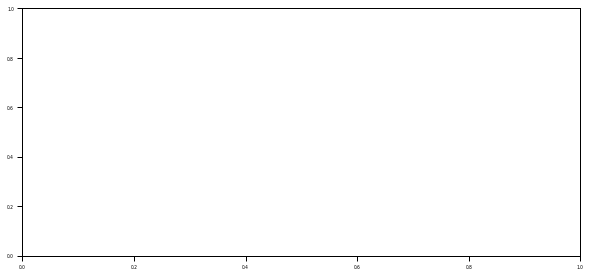

In [167]:


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.distplot(loan['last_pymnt_d_year'])

plt.subplot(2, 1, 2)
bax=sns.boxplot(y='last_pymnt_d_year', x='loan_status', data=loan)
sns.set_context("paper",font_scale=2, rc={"font.size":30,"axes.titlesize":5,"axes.labelsize":10})  
bax.set_yscale('log')
axes.set_ylim(0,9)
plt.show()


**Conclusion: Thus number of defaults shows maximum for the people who made their last payment in 2013. Mostly last payments were made in year 2012 to 2014 for the loans which are fully paid. For defaulted loans last payment year was between 2011 to 2013.**

----

**Column to be analysed:last_pymnt_amnt. Last total payment amount received.**


In [168]:

loan.last_pymnt_amnt.describe()

count    36727.000000
mean      2800.560014
std       4538.095952
min          0.010000
25%        223.600000
50%        592.400000
75%       3554.765000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

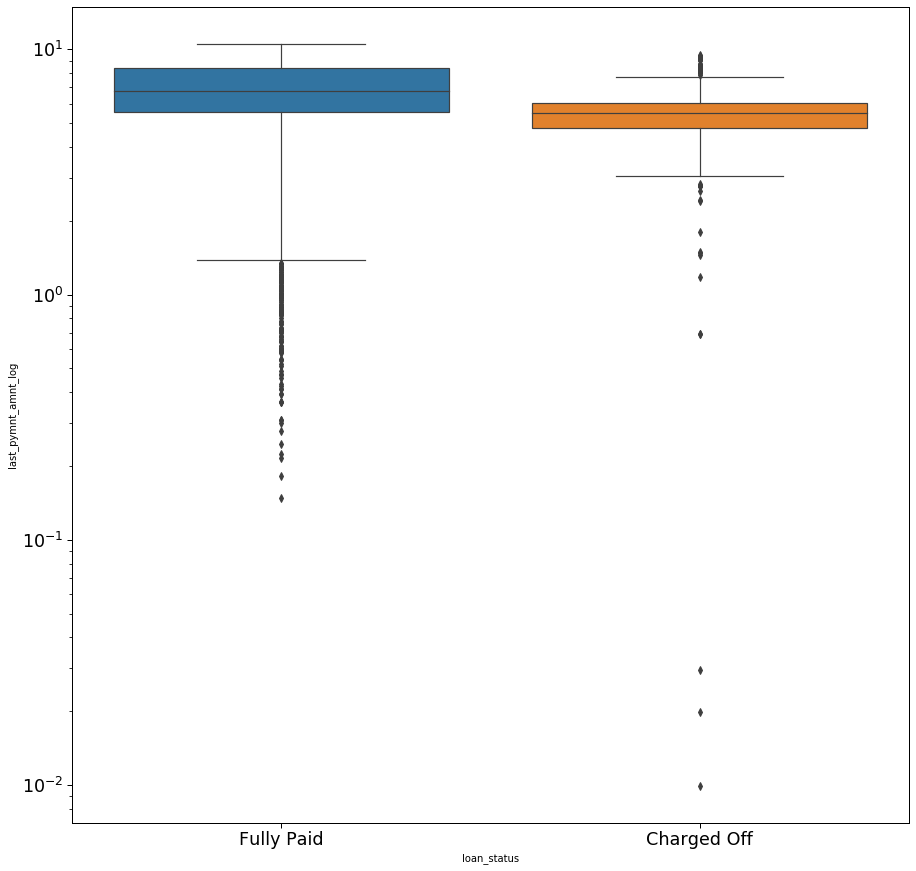

In [170]:
loan['last_pymnt_amnt_log'] = loan['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

plt.figure(figsize=(15,15))

bax=sns.boxplot(y='last_pymnt_amnt_log', x='loan_status', data=loan)
sns.set_context("paper",font_scale=2, rc={"font.size":30,"axes.titlesize":5,"axes.labelsize":10})  
bax.set_yscale('log')
#axes.set_ylim(0,9)
plt.show()


**Conclusion-
The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. This is expected in case of charged of loans**

---

**column to be analysed-last_credit_pull_d-The most recent month LC pulled credit for this loan.**

In [171]:
loan.last_credit_pull_d.value_counts().head()

2016-05-01    8985
2016-04-01    2297
2016-03-01    1087
2013-02-01     825
2016-02-01     704
Name: last_credit_pull_d, dtype: int64

In [172]:
loan['last_credit_pull_d_month']= loan['last_credit_pull_d'].dt.month
loan['last_credit_pull_d_year']= loan['last_credit_pull_d'].dt.year

In [173]:
loan['last_credit_pull_d_month'].isnull().sum()

0

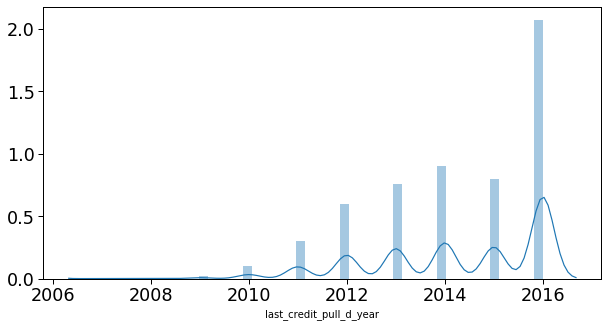

In [174]:
loan.last_credit_pull_d_year.value_counts(normalize=True)

plt.figure(figsize=(10,5))
sns.distplot(loan['last_credit_pull_d_year'])
plt.show()


**Conclusion:**
- Lending Club is pulling more credit reports in recent years, suggesting that the company is taking bad loans more seriously 
- This variable can be ignored in our analysis. 


-------------

**Column to be Analysed-issue_d: The month which the loan was funded .Lets split the available date into month and year column.**

In [175]:

loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

Text(0.5, 0, 'issue_d_year')

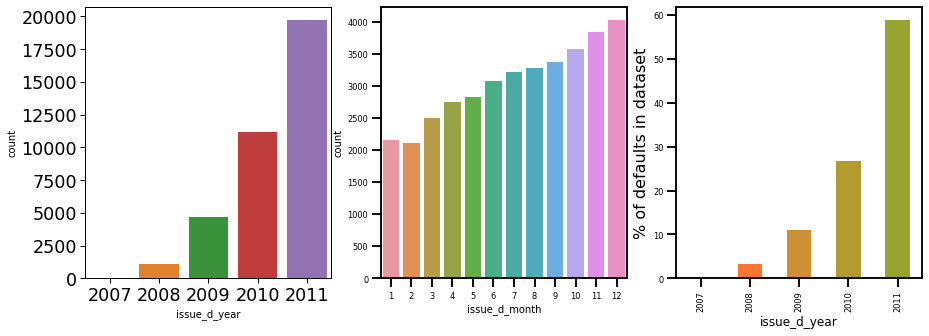

In [176]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.set_context("talk",font_scale=0.5, rc={"font.size":7,"axes.titlesize":8,"axes.labelsize":10}) 
sns.countplot(loan['issue_d_year'], order=sorted(loan.issue_d_year.unique()))
 
plt.subplot(1, 3, 2)
sns.countplot(loan['issue_d_month'], order=sorted(loan.issue_d_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
values = (loan.loc[loan['loan_status']=='Charged Off']['issue_d_year'].value_counts(normalize=True)*100)
values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of defaults in dataset', fontsize=16)
ax.set_xlabel('issue_d_year', fontsize=12)

Conclusion- The no. of loans funded are increasing currently. Over the year of period also , number of loans funded are increased tiill end of year.
Percentage of defaults are also increasing in recent years. The maximum number of defaults occured in 2011.

In [177]:
loan['out_prncp_inv']

0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
39562    0.0
39573    0.0
39623    0.0
39666    0.0
39680    0.0
Name: out_prncp_inv, Length: 36727, dtype: float64

In [178]:
loan['out_prncp_inv'].max()

0.0

<Figure size 4320x4320 with 0 Axes>

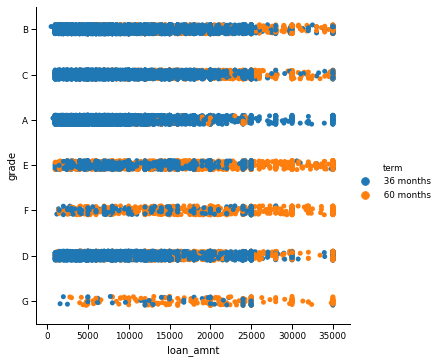

In [180]:
loan1 = loan.melt('loan_amnt', var_name='cols', value_name = 'vals')
plt.figure(figsize=(60, 60))
g = sns.catplot(x = "loan_amnt", y='grade', hue = 'term', data = loan)
sns.set_context("paper",font_scale=1, rc={"font.size":5,"axes.titlesize":10,"axes.labelsize":10})
plt.show()

<Figure size 4320x4320 with 0 Axes>

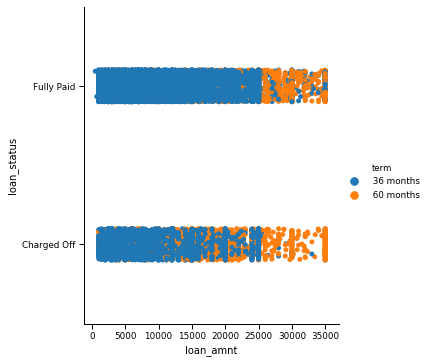

In [181]:
loan1 = loan.melt('loan_amnt', var_name='cols', value_name = 'vals')
plt.figure(figsize=(60, 60))
g = sns.catplot(x = "loan_amnt", y='loan_status', hue = 'term', data = loan)
sns.set_context("paper",font_scale=1, rc={"font.size":5,"axes.titlesize":10,"axes.labelsize":10})
plt.show()


<Figure size 4320x36000 with 0 Axes>

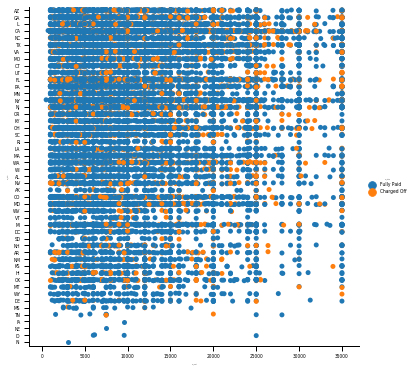

In [183]:

plt.figure(figsize=(60, 500))
g = sns.catplot(x = "loan_amnt", y='addr_state', hue = 'loan_status', data = loan)
sns.set_context("paper",font_scale=0.5, rc={"font.size":0.5,"axes.titlesize":0.5,"axes.labelsize":0.5})
plt.show()

<Figure size 4320x14400 with 0 Axes>

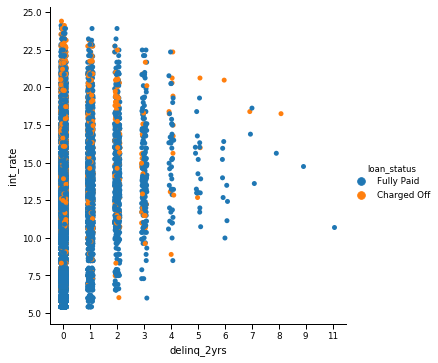

In [185]:


plt.figure(figsize=(60, 200))
g = sns.catplot(x = "delinq_2yrs", y='int_rate', hue = 'loan_status', data = loan)
sns.set_context("paper",font_scale=1, rc={"font.size":5,"axes.titlesize":10,"axes.labelsize":10})
plt.show()


In [186]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'application_type',
       'pub_rec_bankruptcies', 'last_credit_pull_d_month',
       'last_credit_pull_d_year', 'annual_inc_range', 'defaulted',
       'last_pymnt_d_month', 'last_pymnt_d_year', 'last_pymnt_amnt_log',
       'issue_d_month', 'issue_d_year'],
      dtype='object')

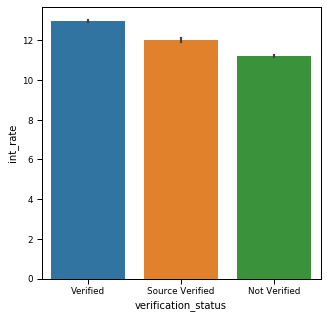

In [198]:
plt.figure(figsize=(5, 5))
#loan[loan['defaulted'] == 1]
sns.barplot(data=loan, y='int_rate', x='verification_status')
sns.set_context("paper", font_scale = 2, rc = {"font.size": 15,"axes.titlesize":15,"axes.labelsize":15})
plt.show()

In [189]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'application_type',
       'pub_rec_bankruptcies', 'last_credit_pull_d_month',
       'last_credit_pull_d_year', 'annual_inc_range', 'defaulted',
       'last_pymnt_d_month', 'last_pymnt_d_year', 'last_pymnt_amnt_log',
       'issue_d_month', 'issue_d_year'],
      dtype='object')

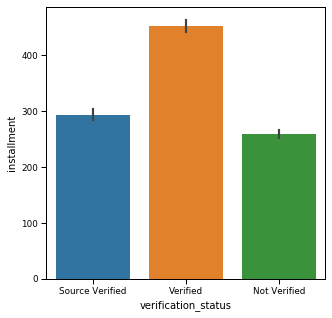

In [201]:
plt.figure(figsize=(5, 5))
loan1 = loan[loan['defaulted'] == 1]
sns.barplot(data=loan1, y='installment', x='verification_status')
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize":10,"axes.labelsize":10})
plt.show()

In [203]:
loan[loan['defaulted']==0]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
5      1075269    1311441       5000         5000           5000.0   
6      1069639    1304742       7000         7000           7000.0   
...        ...        ...        ...          ...              ...   
39475   186572     186568      12000        12000            725.0   
39551   158706     158450      12375        12375           1000.0   
39562   154154     151536       4800         4800           1100.0   
39573   150940     150893       7000         7000           1000.0   
39680   112496     112493       3000         3000            525.0   

             term  int_rate  installment grade sub_grade  \
0       36 months     10.65       162.87     B        B2   
2       36 months     15.96        84.33     C        C5   
3       36 months     13.49       339.31     C        C1   
5       36 months      7.90       156.46     A        A4   
6       60 months     15.96       170.08     C        C5   
...           ...       ...          ...   ...       ...   
39475   36 months      9.01       381.66     B        B2   
39551   36 months     10.91       404.62     C        C3   
39562   36 months     10.28       155.52     C        C1   
39573   36 months     10.59       227.82     C        C2   
39680   36 months     11.86        99.44     D        D1   

                       emp_title emp_length home_ownership  annual_inc  \
0                      Not Known  10+ years           RENT    24000.00   
2                      Not Known  10+ years           RENT    12252.00   
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
...                          ...        ...            ...         ...   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   
39573                  Not Known    3 years       MORTGAGE    63500.00   
39680    Fairfield Manufacturing    2 years       MORTGAGE    36153.00   

      verification_status    issue_d loan_status pymnt_plan  \
0                Verified 2011-12-01  Fully Paid          n   
2            Not Verified 2011-12-01  Fully Paid          n   
3         Source Verified 2011-12-01  Fully Paid          n   
5         Source Verified 2011-12-01  Fully Paid          n   
6            Not Verified 2011-12-01  Fully Paid          n   
...                   ...        ...         ...        ...   
39475        Not Verified 2007-12-01  Fully Paid          n   
39551        Not Verified 2007-12-01  Fully Paid          n   
39562        Not Verified 2007-11-01  Fully Paid          n   
39573        Not Verified 2007-11-01  Fully Paid          n   
39680        Not Verified 2007-08-01  Fully Paid          n   

                                                     url             purpose  \
0      https://lendingclub.com/browse/loanDetail.acti...         credit_card   
2      https://lendingclub.com/browse/loanDetail.acti...      small_business   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
...                                                  ...                 ...   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39562  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
3957

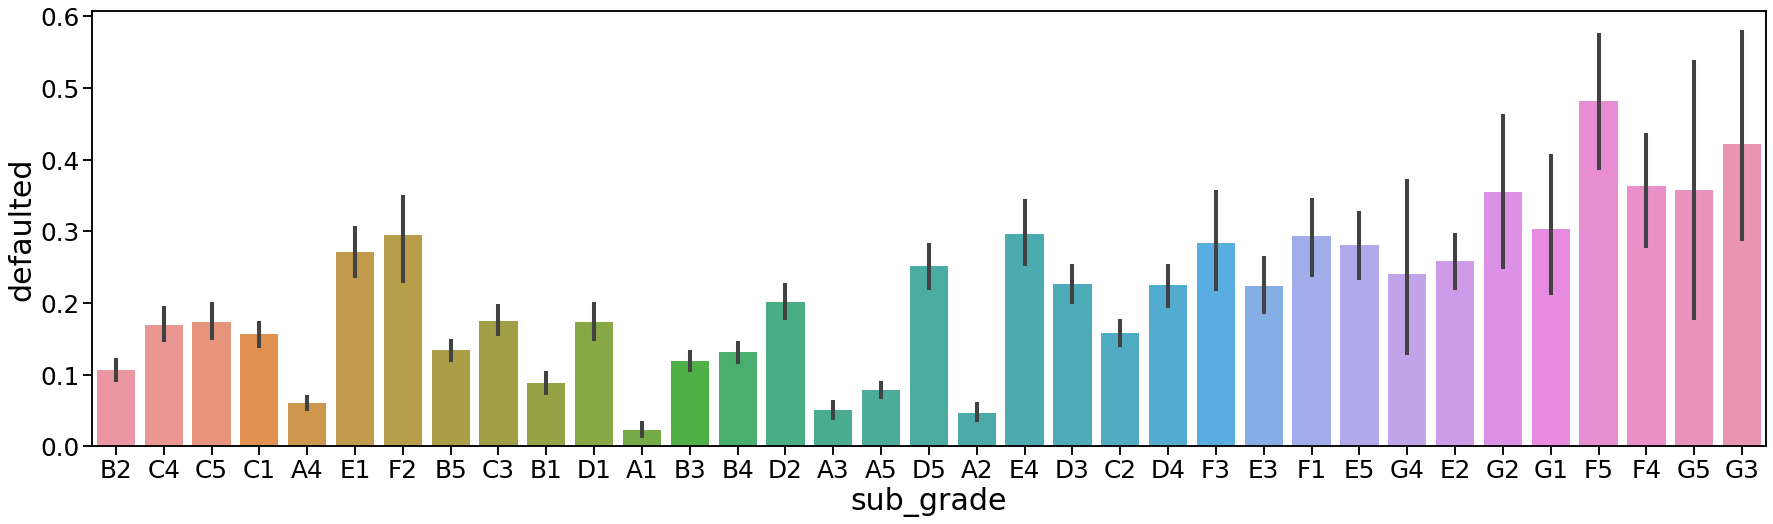

In [236]:
plt.figure(figsize=(30, 8))
sns.barplot(data=loan, y='defaulted', x='sub_grade')
plt.show()

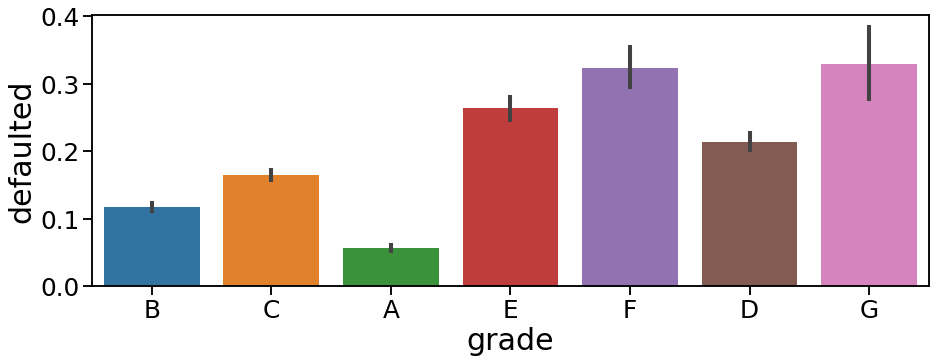

In [242]:
plt.figure(figsize=(15, 5))
sns.barplot(data=loan, y='defaulted', x='grade')
plt.show()

In [243]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'application_type',
       'pub_rec_bankruptcies', 'last_credit_pull_d_month',
       'last_credit_pull_d_year', 'annual_inc_range', 'defaulted',
       'last_pymnt_d_month', 'last_pymnt_d_year', 'last_pymnt_amnt_log',
       'issue_d_month', 'issue_d_year'],
      dtype='object')

In [259]:
loan['installment'].unique()

array([162.87,  59.83,  84.33, ..., 155.52, 507.46,  99.44])

<Figure size 4320x14400 with 0 Axes>

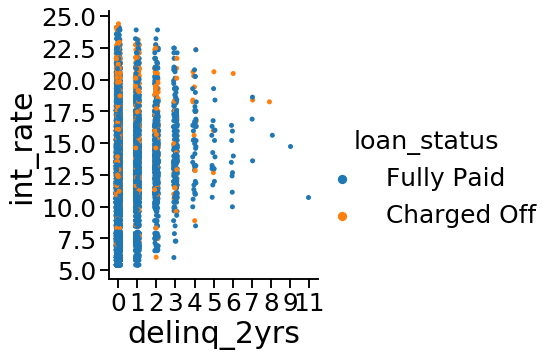

In [247]:
plt.figure(figsize=(60, 200))
g = sns.catplot(x = "delinq_2yrs", y='int_rate', hue = 'loan_status', data = loan)
sns.set_context("paper",font_scale=1, rc={"font.size":5,"axes.titlesize":10,"axes.labelsize":10})
plt.show()

<Figure size 4320x14400 with 0 Axes>

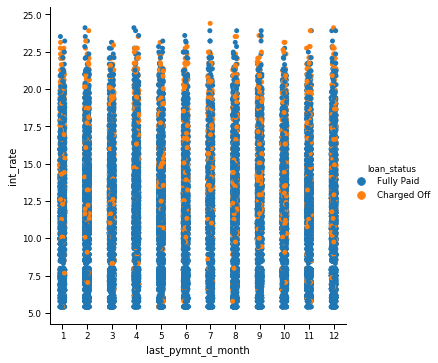

In [248]:
plt.figure(figsize=(60, 200))
g = sns.catplot(x = "last_pymnt_d_month", y='int_rate', hue = 'loan_status', data = loan)
sns.set_context("paper",font_scale=1, rc={"font.size":5,"axes.titlesize":10,"axes.labelsize":10})
plt.show()

<Figure size 4320x14400 with 0 Axes>

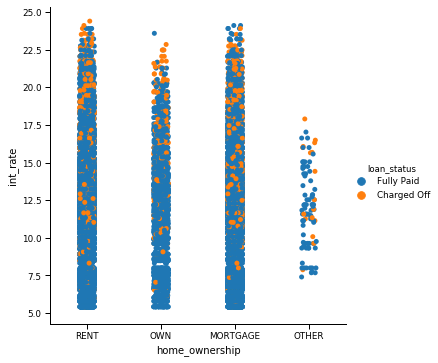

In [254]:
plt.figure(figsize=(60, 200))
g = sns.catplot(x = "home_ownership", y='int_rate', hue = 'loan_status', data = loan)
sns.set_context("paper",font_scale=1, rc={"font.size":5,"axes.titlesize":10,"axes.labelsize":10})
plt.show()

<Figure size 14400x14400 with 0 Axes>

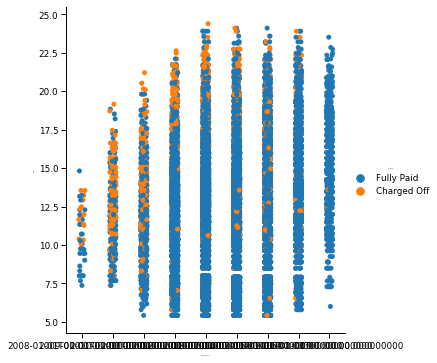

In [258]:
plt.figure(figsize=(200, 200))
g = sns.catplot(x = "last_pymnt_d_year", y='int_rate', hue = 'loan_status', data = loan)
sns.set_context("paper",font_scale=1, rc={"font.size":5,"axes.titlesize":1,"axes.labelsize":1})
plt.show()

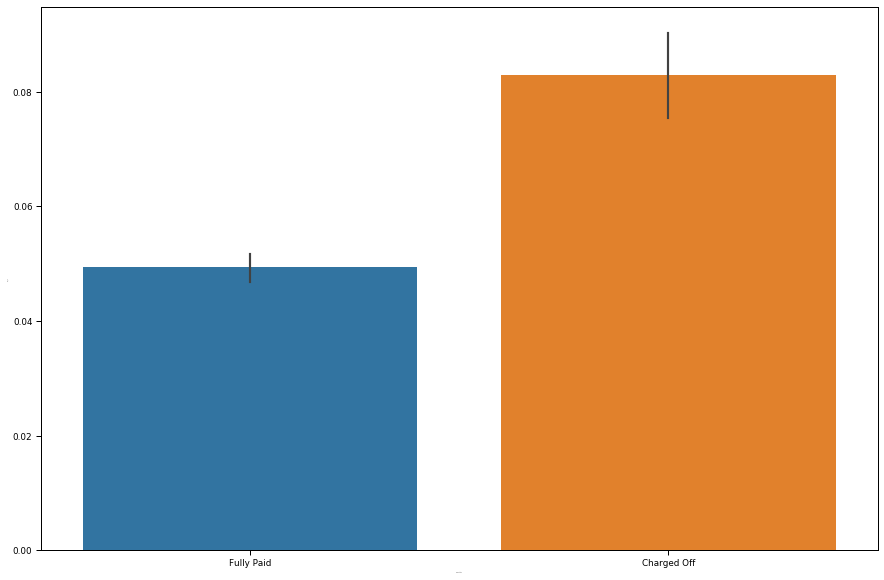

In [260]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='pub_rec',data=loan)
plt.xlabel("Loan Status")
plt.show()

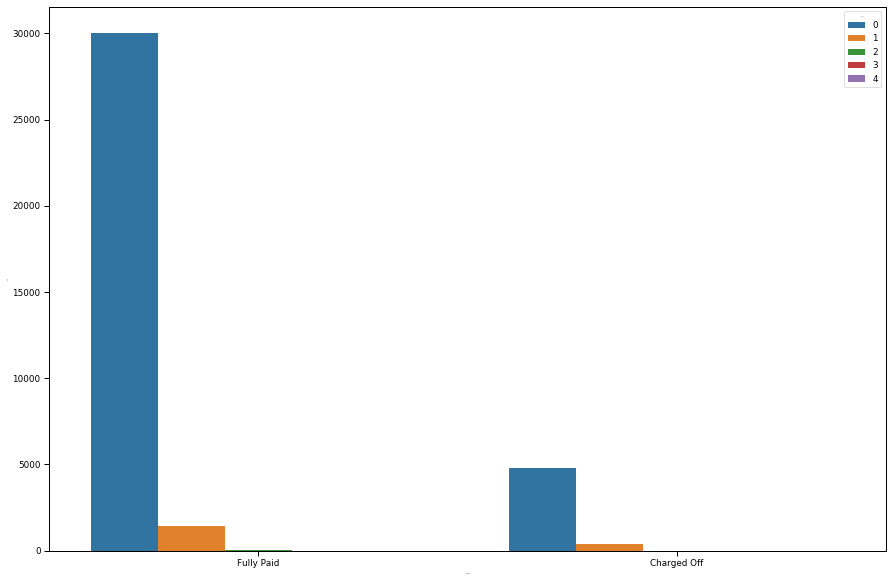

In [262]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status", hue='pub_rec', data=loan)
plt.show()

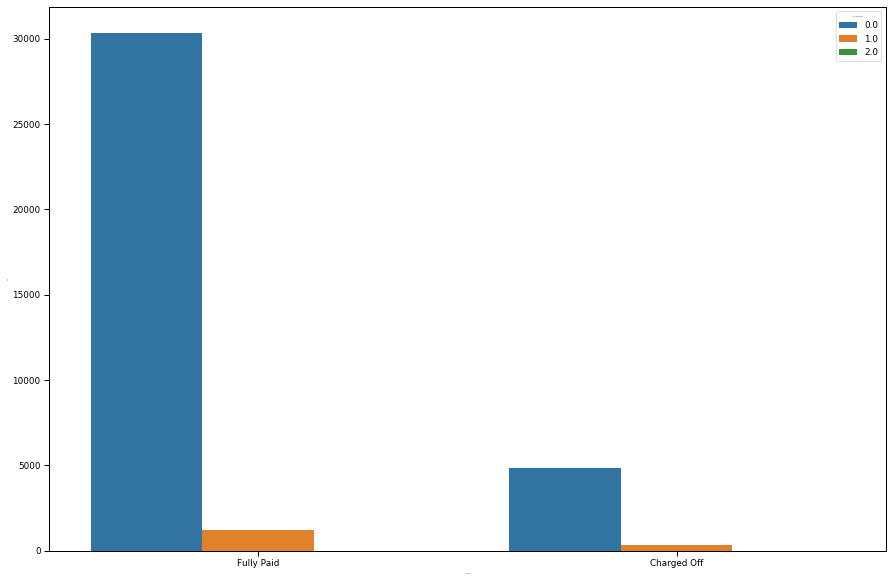

In [264]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status", hue='pub_rec_bankruptcies', data=loan)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


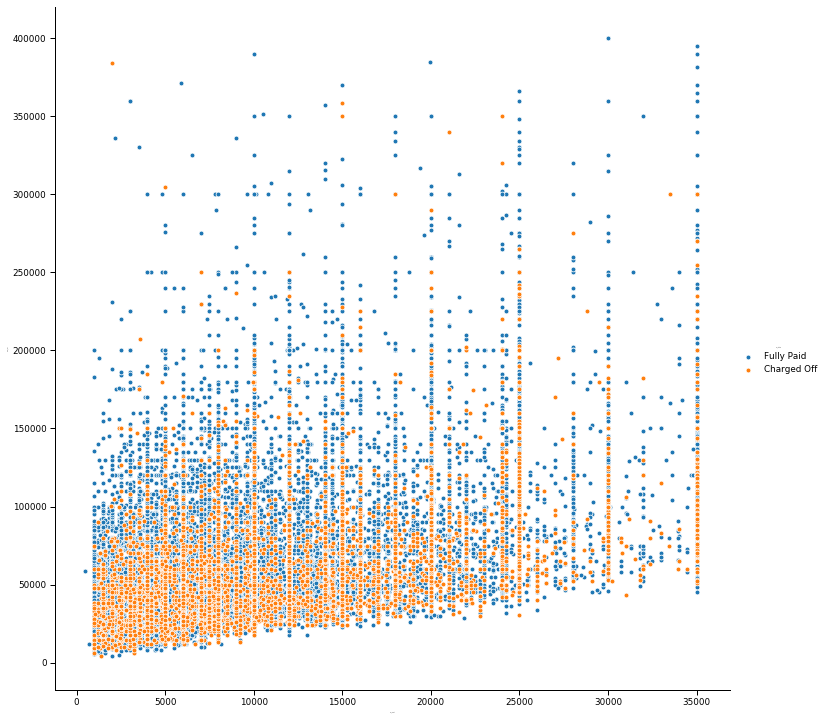

In [265]:
temp = loan[loan['annual_inc'] < 400000] 
sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=temp, hue="loan_status", size=10)
plt.show()

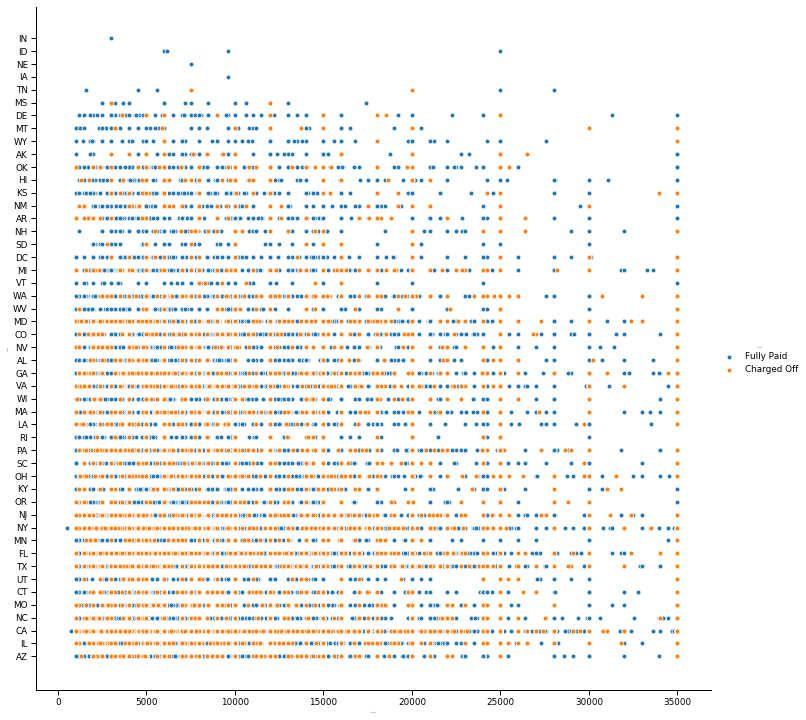

In [266]:
sns.pairplot(x_vars=["loan_amnt"], y_vars=["addr_state"], data=loan, hue="loan_status", size=10)
plt.show()

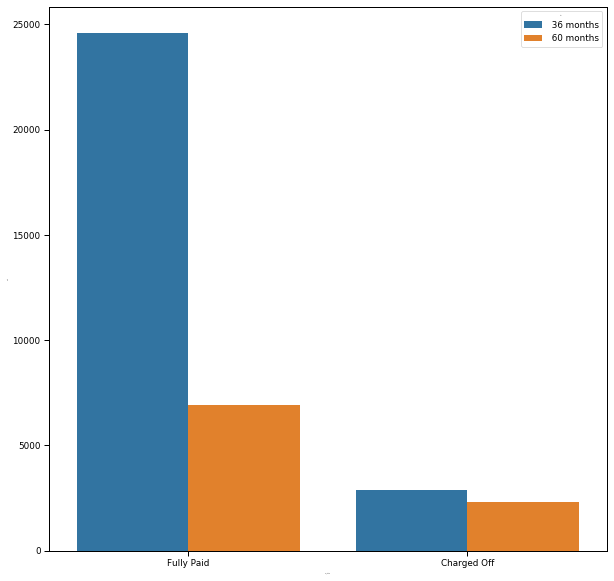

In [267]:
plt.figure(figsize=(10,10))
sns.countplot(x="loan_status", hue='term', data=loan)
plt.show()

In [268]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

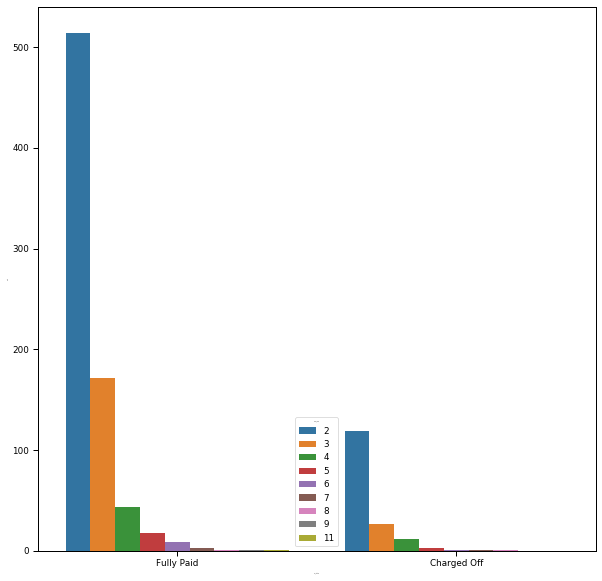

In [269]:
plt.figure(figsize=(10,10))
temp1 = loan[loan['delinq_2yrs'] > 1]
sns.countplot(x="loan_status", hue='delinq_2yrs', data=temp1)
plt.show()